In [1]:
# Neural Network: Python codes: Housing
#----------------------------------------

import os

os.getcwd()

'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Regression\\Housing'

In [2]:
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation, concatenate, Dropout

Using TensorFlow backend.


In [4]:
# Load the Housing Compressive Strength dataset.

dataset = np.loadtxt("Housing-Training-Data.txt")

X = dataset[:, 0:13]
Y = dataset[:, 13]

# Input variable of tree_like_nn

x_group = [[5], [12], [0], [7], [5], [12]]

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]
X5 = dataset[:, x_group[4]]
X6 = dataset[:, x_group[5]]

print(X1.shape, X2.shape, X3.shape, X4.shape, X5.shape, X6.shape)
print(Y.shape)


(506, 1) (506, 1) (506, 1) (506, 1) (506, 1) (506, 1)
(506,)


In [5]:
dataset.shape

(506, 14)

In [6]:
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

X1_sample_mean = X_sample_mean[x_group[0]]
print(np.round(X1_sample_mean, 4))

X1_sample_std = X_sample_std[x_group[0]]
print(np.round(X1_sample_std, 4))

X2_sample_mean = X_sample_mean[x_group[1]]
print(np.round(X2_sample_mean, 4))

X2_sample_std = X_sample_std[x_group[1]]
print(np.round(X2_sample_std, 4))

X3_sample_mean = X_sample_mean[x_group[2]]
print(np.round(X3_sample_mean, 4))

X3_sample_std = X_sample_std[x_group[2]]
print(np.round(X3_sample_std, 4))

X4_sample_mean = X_sample_mean[x_group[3]]
print(np.round(X4_sample_mean, 4))

X4_sample_std = X_sample_std[x_group[3]]
print(np.round(X4_sample_std, 4))

X5_sample_mean = X_sample_mean[x_group[4]]
print(np.round(X5_sample_mean, 4))

X5_sample_std = X_sample_std[x_group[4]]
print(np.round(X5_sample_std, 4))

X6_sample_mean = X_sample_mean[x_group[5]]
print(np.round(X6_sample_mean, 4))

X6_sample_std = X_sample_std[x_group[5]]
print(np.round(X6_sample_std, 4))

Y_sample_mean = np.mean(Y, axis = 0)
print(np.round(Y_sample_mean, 4))

Y_sample_std = np.std(Y, axis = 0, ddof = 1)
print(np.round(Y_sample_std, 4))

#----------------------------------------
standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]
X5_train = X_train[:, x_group[4]]
X6_train = X_train[:, x_group[5]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X5_train, axis = 0), 4))
print(np.round(np.std(X5_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X6_train, axis = 0), 4))
print(np.round(np.std(X6_train, axis = 0, ddof = 1), 4))

Y_train = standardize(Y)

print(np.round(np.mean(Y_train, axis = 0), 4))
print(np.round(np.std(Y_train, axis = 0, ddof = 1), 4))

[3.613500e+00 1.136360e+01 1.113680e+01 6.920000e-02 5.547000e-01
 6.284600e+00 6.857490e+01 3.795000e+00 9.549400e+00 4.082372e+02
 1.845550e+01 3.566740e+02 1.265310e+01]
[8.601500e+00 2.332250e+01 6.860400e+00 2.540000e-01 1.159000e-01
 7.026000e-01 2.814890e+01 2.105700e+00 8.707300e+00 1.685371e+02
 2.164900e+00 9.129490e+01 7.141100e+00]
[6.2846]
[0.7026]
[12.6531]
[7.1411]
[3.6135]
[8.6015]
[3.795]
[2.1057]
[6.2846]
[0.7026]
[12.6531]
[7.1411]
22.5328
9.1971
[-0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]
[0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]
-0.0
1.0


In [7]:
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)

In [8]:
#----------------------------------------
# 10-fold cross validation

cv_mse = []
cv_mae = []

for k in range(fold_num):
  input_g1 = Input(shape = (1,))
  x1 = input_g1
  t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
  t1 = Dropout(rate = 0.1)(t1)
  #
  y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
  y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
  #
  input_g2 = Input(shape = (1,))
  x2 = concatenate([y11, input_g2], axis = 1)  # column bind
  t2 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x2)
  t2 = Dropout(rate = 0.1)(t2)
  #
  y21 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
  y22 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
  #
  input_g3 = Input(shape = (1,))
  x3 = concatenate([y21, input_g3], axis = 1)  # column bind
  t3 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x3)
  t3 = Dropout(rate = 0.1)(t3)
  #
  y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
  y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
  #
  input_g6 = Input(shape = (1,))
  x6 = concatenate([y22, input_g6], axis = 1)  # column bind
  t6 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x6)
  t6 = Dropout(rate = 0.1)(t6)
  #
  y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
  y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
  #
  input_g9 = Input(shape = (1,))
  x9 = concatenate([y12, input_g9], axis = 1)  # column bind
  t9 = Dense(units = 3, kernel_initializer = "uniform", activation = "linear")(x9)
  t9 = Dropout(rate = 0.1)(t9)
  #
  y91 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
  y92 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t9)
  #
  input_g10 = Input(shape = (1,))
  x10 = concatenate([y91, input_g10], axis = 1)  # column bind
  t10 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x10)
  t10 = Dropout(rate = 0.1)(t10)
  #
  y101 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
  y102 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t10)
  #
  x_final =  concatenate([y31, y32, y61, y62, y92, y101, y102], axis = 1)  # column bind
  y_final = Dense(units = 5, kernel_initializer = "uniform", activation = "relu")(x_final)
  y_final = Dropout(rate = 0.1)(y_final)
  y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(y_final)
  response = y_final
  #
  model = Model(inputs = [input_g1, input_g2, input_g3, input_g6, input_g9, input_g10], 
		outputs = response)
  #
  #model.summary()
  # Compile the model.
  model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
  # Select index sets.
  seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
  test_index = index[seq_index]
  train_index = np.delete(index, seq_index)
  # Fit the model.
  history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index]
  , X4_train[train_index], X5_train[train_index], X6_train[train_index]]
  , Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 2)
  # Evaluate the model.
  scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index]
  , X4_train[test_index], X5_train[test_index], X6_train[test_index]]
  , Y_train[test_index], verbose = 0)
  print("%s: %.4f" % (model.metrics_names[0], scores[0]))
  print("%s: %.4f" % (model.metrics_names[1], scores[1]))
  cv_mse.append(scores[0])
  cv_mae.append(scores[1])


Train on 364 samples, validate on 91 samples
Epoch 1/1000
 - 1s - loss: 0.9928 - mean_absolute_error: 0.7223 - val_loss: 1.1070 - val_mean_absolute_error: 0.7559
Epoch 2/1000
 - 0s - loss: 0.9929 - mean_absolute_error: 0.7220 - val_loss: 1.1075 - val_mean_absolute_error: 0.7555
Epoch 3/1000
 - 0s - loss: 0.9925 - mean_absolute_error: 0.7219 - val_loss: 1.1068 - val_mean_absolute_error: 0.7557
Epoch 4/1000
 - 0s - loss: 0.9923 - mean_absolute_error: 0.7222 - val_loss: 1.1059 - val_mean_absolute_error: 0.7556
Epoch 5/1000
 - 0s - loss: 0.9908 - mean_absolute_error: 0.7220 - val_loss: 1.1021 - val_mean_absolute_error: 0.7548
Epoch 6/1000
 - 0s - loss: 0.9867 - mean_absolute_error: 0.7211 - val_loss: 1.0925 - val_mean_absolute_error: 0.7524
Epoch 7/1000
 - 0s - loss: 0.9756 - mean_absolute_error: 0.7195 - val_loss: 1.0675 - val_mean_absolute_error: 0.7475
Epoch 8/1000
 - 0s - loss: 0.9522 - mean_absolute_error: 0.7144 - val_loss: 1.0217 - val_mean_absolute_error: 0.7371
Epoch 9/1000
 - 0s 

Epoch 71/1000
 - 0s - loss: 0.3087 - mean_absolute_error: 0.3927 - val_loss: 0.2065 - val_mean_absolute_error: 0.3559
Epoch 72/1000
 - 0s - loss: 0.3130 - mean_absolute_error: 0.4115 - val_loss: 0.2070 - val_mean_absolute_error: 0.3567
Epoch 73/1000
 - 0s - loss: 0.3196 - mean_absolute_error: 0.4030 - val_loss: 0.2117 - val_mean_absolute_error: 0.3611
Epoch 74/1000
 - 0s - loss: 0.3133 - mean_absolute_error: 0.3891 - val_loss: 0.2112 - val_mean_absolute_error: 0.3610
Epoch 75/1000
 - 0s - loss: 0.3045 - mean_absolute_error: 0.3890 - val_loss: 0.2057 - val_mean_absolute_error: 0.3575
Epoch 76/1000
 - 0s - loss: 0.3012 - mean_absolute_error: 0.3904 - val_loss: 0.2007 - val_mean_absolute_error: 0.3553
Epoch 77/1000
 - 0s - loss: 0.3687 - mean_absolute_error: 0.4090 - val_loss: 0.2199 - val_mean_absolute_error: 0.3659
Epoch 78/1000
 - 0s - loss: 0.3335 - mean_absolute_error: 0.3999 - val_loss: 0.2129 - val_mean_absolute_error: 0.3617
Epoch 79/1000
 - 0s - loss: 0.3327 - mean_absolute_error

 - 0s - loss: 0.2433 - mean_absolute_error: 0.3576 - val_loss: 0.1767 - val_mean_absolute_error: 0.3352
Epoch 141/1000
 - 0s - loss: 0.2750 - mean_absolute_error: 0.3513 - val_loss: 0.1814 - val_mean_absolute_error: 0.3376
Epoch 142/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.3869 - val_loss: 0.1808 - val_mean_absolute_error: 0.3377
Epoch 143/1000
 - 0s - loss: 0.2964 - mean_absolute_error: 0.3740 - val_loss: 0.1783 - val_mean_absolute_error: 0.3378
Epoch 144/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.3967 - val_loss: 0.1868 - val_mean_absolute_error: 0.3405
Epoch 145/1000
 - 0s - loss: 0.2751 - mean_absolute_error: 0.3667 - val_loss: 0.1750 - val_mean_absolute_error: 0.3322
Epoch 146/1000
 - 0s - loss: 0.2978 - mean_absolute_error: 0.3798 - val_loss: 0.1740 - val_mean_absolute_error: 0.3312
Epoch 147/1000
 - 0s - loss: 0.2884 - mean_absolute_error: 0.3729 - val_loss: 0.1772 - val_mean_absolute_error: 0.3343
Epoch 148/1000
 - 0s - loss: 0.2832 - mean_absolute_error: 0.36

Epoch 209/1000
 - 0s - loss: 0.3009 - mean_absolute_error: 0.3552 - val_loss: 0.1843 - val_mean_absolute_error: 0.3383
Epoch 210/1000
 - 0s - loss: 0.3152 - mean_absolute_error: 0.3669 - val_loss: 0.1840 - val_mean_absolute_error: 0.3384
Epoch 211/1000
 - 0s - loss: 0.2859 - mean_absolute_error: 0.3760 - val_loss: 0.1750 - val_mean_absolute_error: 0.3337
Epoch 212/1000
 - 0s - loss: 0.2681 - mean_absolute_error: 0.3545 - val_loss: 0.1770 - val_mean_absolute_error: 0.3337
Epoch 213/1000
 - 0s - loss: 0.2555 - mean_absolute_error: 0.3546 - val_loss: 0.1753 - val_mean_absolute_error: 0.3328
Epoch 214/1000
 - 0s - loss: 0.2710 - mean_absolute_error: 0.3455 - val_loss: 0.1740 - val_mean_absolute_error: 0.3311
Epoch 215/1000
 - 0s - loss: 0.3109 - mean_absolute_error: 0.3762 - val_loss: 0.1781 - val_mean_absolute_error: 0.3345
Epoch 216/1000
 - 0s - loss: 0.2750 - mean_absolute_error: 0.3570 - val_loss: 0.1859 - val_mean_absolute_error: 0.3392
Epoch 217/1000
 - 0s - loss: 0.2552 - mean_absol

Epoch 278/1000
 - 0s - loss: 0.2824 - mean_absolute_error: 0.3698 - val_loss: 0.1719 - val_mean_absolute_error: 0.3348
Epoch 279/1000
 - 0s - loss: 0.2589 - mean_absolute_error: 0.3532 - val_loss: 0.1718 - val_mean_absolute_error: 0.3330
Epoch 280/1000
 - 0s - loss: 0.2900 - mean_absolute_error: 0.3534 - val_loss: 0.1825 - val_mean_absolute_error: 0.3369
Epoch 281/1000
 - 0s - loss: 0.2605 - mean_absolute_error: 0.3548 - val_loss: 0.1791 - val_mean_absolute_error: 0.3353
Epoch 282/1000
 - 0s - loss: 0.2794 - mean_absolute_error: 0.3678 - val_loss: 0.1751 - val_mean_absolute_error: 0.3343
Epoch 283/1000
 - 0s - loss: 0.2408 - mean_absolute_error: 0.3418 - val_loss: 0.1745 - val_mean_absolute_error: 0.3338
Epoch 284/1000
 - 0s - loss: 0.3039 - mean_absolute_error: 0.3659 - val_loss: 0.1751 - val_mean_absolute_error: 0.3350
Epoch 285/1000
 - 0s - loss: 0.2580 - mean_absolute_error: 0.3408 - val_loss: 0.1767 - val_mean_absolute_error: 0.3353
Epoch 286/1000
 - 0s - loss: 0.2716 - mean_absol

Epoch 347/1000
 - 0s - loss: 0.2586 - mean_absolute_error: 0.3405 - val_loss: 0.1728 - val_mean_absolute_error: 0.3237
Epoch 348/1000
 - 0s - loss: 0.2722 - mean_absolute_error: 0.3422 - val_loss: 0.1603 - val_mean_absolute_error: 0.3169
Epoch 349/1000
 - 0s - loss: 0.2532 - mean_absolute_error: 0.3397 - val_loss: 0.1665 - val_mean_absolute_error: 0.3199
Epoch 350/1000
 - 0s - loss: 0.2519 - mean_absolute_error: 0.3439 - val_loss: 0.1672 - val_mean_absolute_error: 0.3207
Epoch 351/1000
 - 0s - loss: 0.2621 - mean_absolute_error: 0.3480 - val_loss: 0.1692 - val_mean_absolute_error: 0.3219
Epoch 352/1000
 - 0s - loss: 0.2240 - mean_absolute_error: 0.3259 - val_loss: 0.1679 - val_mean_absolute_error: 0.3207
Epoch 353/1000
 - 0s - loss: 0.2249 - mean_absolute_error: 0.3393 - val_loss: 0.1683 - val_mean_absolute_error: 0.3216
Epoch 354/1000
 - 0s - loss: 0.2408 - mean_absolute_error: 0.3392 - val_loss: 0.1806 - val_mean_absolute_error: 0.3285
Epoch 355/1000
 - 0s - loss: 0.2344 - mean_absol

Epoch 416/1000
 - 0s - loss: 0.2432 - mean_absolute_error: 0.3390 - val_loss: 0.1595 - val_mean_absolute_error: 0.3067
Epoch 417/1000
 - 0s - loss: 0.2835 - mean_absolute_error: 0.3664 - val_loss: 0.1578 - val_mean_absolute_error: 0.3071
Epoch 418/1000
 - 0s - loss: 0.3060 - mean_absolute_error: 0.3594 - val_loss: 0.1603 - val_mean_absolute_error: 0.3077
Epoch 419/1000
 - 0s - loss: 0.2271 - mean_absolute_error: 0.3381 - val_loss: 0.1607 - val_mean_absolute_error: 0.3088
Epoch 420/1000
 - 0s - loss: 0.2487 - mean_absolute_error: 0.3360 - val_loss: 0.1578 - val_mean_absolute_error: 0.3077
Epoch 421/1000
 - 0s - loss: 0.2444 - mean_absolute_error: 0.3371 - val_loss: 0.1607 - val_mean_absolute_error: 0.3089
Epoch 422/1000
 - 0s - loss: 0.2842 - mean_absolute_error: 0.3577 - val_loss: 0.1612 - val_mean_absolute_error: 0.3076
Epoch 423/1000
 - 0s - loss: 0.2647 - mean_absolute_error: 0.3612 - val_loss: 0.1585 - val_mean_absolute_error: 0.3078
Epoch 424/1000
 - 0s - loss: 0.2354 - mean_absol

Epoch 485/1000
 - 0s - loss: 0.2470 - mean_absolute_error: 0.3454 - val_loss: 0.1638 - val_mean_absolute_error: 0.3061
Epoch 486/1000
 - 0s - loss: 0.2129 - mean_absolute_error: 0.3271 - val_loss: 0.1642 - val_mean_absolute_error: 0.3071
Epoch 487/1000
 - 0s - loss: 0.2475 - mean_absolute_error: 0.3347 - val_loss: 0.1562 - val_mean_absolute_error: 0.2998
Epoch 488/1000
 - 0s - loss: 0.2660 - mean_absolute_error: 0.3577 - val_loss: 0.1572 - val_mean_absolute_error: 0.3009
Epoch 489/1000
 - 0s - loss: 0.2495 - mean_absolute_error: 0.3446 - val_loss: 0.1688 - val_mean_absolute_error: 0.3122
Epoch 490/1000
 - 0s - loss: 0.2280 - mean_absolute_error: 0.3291 - val_loss: 0.1600 - val_mean_absolute_error: 0.3044
Epoch 491/1000
 - 0s - loss: 0.2221 - mean_absolute_error: 0.3327 - val_loss: 0.1582 - val_mean_absolute_error: 0.3026
Epoch 492/1000
 - 0s - loss: 0.2552 - mean_absolute_error: 0.3351 - val_loss: 0.1607 - val_mean_absolute_error: 0.3036
Epoch 493/1000
 - 0s - loss: 0.2790 - mean_absol

Epoch 554/1000
 - 0s - loss: 0.2692 - mean_absolute_error: 0.3429 - val_loss: 0.1597 - val_mean_absolute_error: 0.3036
Epoch 555/1000
 - 0s - loss: 0.2389 - mean_absolute_error: 0.3407 - val_loss: 0.1519 - val_mean_absolute_error: 0.2952
Epoch 556/1000
 - 0s - loss: 0.2467 - mean_absolute_error: 0.3452 - val_loss: 0.1527 - val_mean_absolute_error: 0.2961
Epoch 557/1000
 - 0s - loss: 0.2331 - mean_absolute_error: 0.3312 - val_loss: 0.1622 - val_mean_absolute_error: 0.3045
Epoch 558/1000
 - 0s - loss: 0.2305 - mean_absolute_error: 0.3346 - val_loss: 0.1548 - val_mean_absolute_error: 0.2960
Epoch 559/1000
 - 0s - loss: 0.2270 - mean_absolute_error: 0.3383 - val_loss: 0.1553 - val_mean_absolute_error: 0.2970
Epoch 560/1000
 - 0s - loss: 0.2435 - mean_absolute_error: 0.3501 - val_loss: 0.1509 - val_mean_absolute_error: 0.2956
Epoch 561/1000
 - 0s - loss: 0.2404 - mean_absolute_error: 0.3417 - val_loss: 0.1512 - val_mean_absolute_error: 0.2937
Epoch 562/1000
 - 0s - loss: 0.2457 - mean_absol

Epoch 623/1000
 - 0s - loss: 0.2067 - mean_absolute_error: 0.3333 - val_loss: 0.1547 - val_mean_absolute_error: 0.2996
Epoch 624/1000
 - 0s - loss: 0.1848 - mean_absolute_error: 0.3232 - val_loss: 0.1521 - val_mean_absolute_error: 0.2947
Epoch 625/1000
 - 0s - loss: 0.2553 - mean_absolute_error: 0.3445 - val_loss: 0.1542 - val_mean_absolute_error: 0.2970
Epoch 626/1000
 - 0s - loss: 0.2707 - mean_absolute_error: 0.3512 - val_loss: 0.1556 - val_mean_absolute_error: 0.2983
Epoch 627/1000
 - 0s - loss: 0.2186 - mean_absolute_error: 0.3388 - val_loss: 0.1513 - val_mean_absolute_error: 0.2950
Epoch 628/1000
 - 0s - loss: 0.1936 - mean_absolute_error: 0.3178 - val_loss: 0.1511 - val_mean_absolute_error: 0.2956
Epoch 629/1000
 - 0s - loss: 0.2171 - mean_absolute_error: 0.3362 - val_loss: 0.1491 - val_mean_absolute_error: 0.2924
Epoch 630/1000
 - 0s - loss: 0.2193 - mean_absolute_error: 0.3306 - val_loss: 0.1579 - val_mean_absolute_error: 0.3026
Epoch 631/1000
 - 0s - loss: 0.2463 - mean_absol

Epoch 692/1000
 - 0s - loss: 0.1730 - mean_absolute_error: 0.3049 - val_loss: 0.1495 - val_mean_absolute_error: 0.2948
Epoch 693/1000
 - 0s - loss: 0.2080 - mean_absolute_error: 0.3213 - val_loss: 0.1534 - val_mean_absolute_error: 0.2982
Epoch 694/1000
 - 0s - loss: 0.2371 - mean_absolute_error: 0.3333 - val_loss: 0.1502 - val_mean_absolute_error: 0.2946
Epoch 695/1000
 - 0s - loss: 0.2307 - mean_absolute_error: 0.3247 - val_loss: 0.1508 - val_mean_absolute_error: 0.2964
Epoch 696/1000
 - 0s - loss: 0.1858 - mean_absolute_error: 0.3094 - val_loss: 0.1594 - val_mean_absolute_error: 0.3049
Epoch 697/1000
 - 0s - loss: 0.2029 - mean_absolute_error: 0.3243 - val_loss: 0.1555 - val_mean_absolute_error: 0.3002
Epoch 698/1000
 - 0s - loss: 0.2271 - mean_absolute_error: 0.3316 - val_loss: 0.1560 - val_mean_absolute_error: 0.3011
Epoch 699/1000
 - 0s - loss: 0.2086 - mean_absolute_error: 0.3275 - val_loss: 0.1530 - val_mean_absolute_error: 0.2968
Epoch 700/1000
 - 0s - loss: 0.2242 - mean_absol

Epoch 761/1000
 - 0s - loss: 0.2411 - mean_absolute_error: 0.3467 - val_loss: 0.1581 - val_mean_absolute_error: 0.3017
Epoch 762/1000
 - 0s - loss: 0.2096 - mean_absolute_error: 0.3287 - val_loss: 0.1514 - val_mean_absolute_error: 0.2914
Epoch 763/1000
 - 0s - loss: 0.1992 - mean_absolute_error: 0.3167 - val_loss: 0.1479 - val_mean_absolute_error: 0.2870
Epoch 764/1000
 - 0s - loss: 0.1979 - mean_absolute_error: 0.3234 - val_loss: 0.1533 - val_mean_absolute_error: 0.2934
Epoch 765/1000
 - 0s - loss: 0.1918 - mean_absolute_error: 0.3209 - val_loss: 0.1483 - val_mean_absolute_error: 0.2880
Epoch 766/1000
 - 0s - loss: 0.1971 - mean_absolute_error: 0.3142 - val_loss: 0.1509 - val_mean_absolute_error: 0.2894
Epoch 767/1000
 - 0s - loss: 0.2035 - mean_absolute_error: 0.3182 - val_loss: 0.1505 - val_mean_absolute_error: 0.2884
Epoch 768/1000
 - 0s - loss: 0.1950 - mean_absolute_error: 0.3218 - val_loss: 0.1509 - val_mean_absolute_error: 0.2872
Epoch 769/1000
 - 0s - loss: 0.2113 - mean_absol

Epoch 830/1000
 - 0s - loss: 0.2290 - mean_absolute_error: 0.3378 - val_loss: 0.1484 - val_mean_absolute_error: 0.2865
Epoch 831/1000
 - 0s - loss: 0.2082 - mean_absolute_error: 0.3331 - val_loss: 0.1492 - val_mean_absolute_error: 0.2877
Epoch 832/1000
 - 0s - loss: 0.2216 - mean_absolute_error: 0.3372 - val_loss: 0.1537 - val_mean_absolute_error: 0.2927
Epoch 833/1000
 - 0s - loss: 0.1910 - mean_absolute_error: 0.3214 - val_loss: 0.1490 - val_mean_absolute_error: 0.2871
Epoch 834/1000
 - 0s - loss: 0.1869 - mean_absolute_error: 0.3179 - val_loss: 0.1511 - val_mean_absolute_error: 0.2869
Epoch 835/1000
 - 0s - loss: 0.2311 - mean_absolute_error: 0.3210 - val_loss: 0.1475 - val_mean_absolute_error: 0.2835
Epoch 836/1000
 - 0s - loss: 0.2062 - mean_absolute_error: 0.3326 - val_loss: 0.1518 - val_mean_absolute_error: 0.2895
Epoch 837/1000
 - 0s - loss: 0.2261 - mean_absolute_error: 0.3356 - val_loss: 0.1691 - val_mean_absolute_error: 0.3077
Epoch 838/1000
 - 0s - loss: 0.2129 - mean_absol

Epoch 899/1000
 - 0s - loss: 0.2123 - mean_absolute_error: 0.3347 - val_loss: 0.1569 - val_mean_absolute_error: 0.2953
Epoch 900/1000
 - 0s - loss: 0.2140 - mean_absolute_error: 0.3395 - val_loss: 0.1528 - val_mean_absolute_error: 0.2887
Epoch 901/1000
 - 0s - loss: 0.1773 - mean_absolute_error: 0.3116 - val_loss: 0.1489 - val_mean_absolute_error: 0.2813
Epoch 902/1000
 - 0s - loss: 0.2072 - mean_absolute_error: 0.3266 - val_loss: 0.1534 - val_mean_absolute_error: 0.2894
Epoch 903/1000
 - 0s - loss: 0.2289 - mean_absolute_error: 0.3305 - val_loss: 0.1520 - val_mean_absolute_error: 0.2867
Epoch 904/1000
 - 0s - loss: 0.2064 - mean_absolute_error: 0.3191 - val_loss: 0.1520 - val_mean_absolute_error: 0.2833
Epoch 905/1000
 - 0s - loss: 0.2126 - mean_absolute_error: 0.3246 - val_loss: 0.1513 - val_mean_absolute_error: 0.2845
Epoch 906/1000
 - 0s - loss: 0.2071 - mean_absolute_error: 0.3105 - val_loss: 0.1518 - val_mean_absolute_error: 0.2858
Epoch 907/1000
 - 0s - loss: 0.1920 - mean_absol

Epoch 968/1000
 - 0s - loss: 0.2240 - mean_absolute_error: 0.3239 - val_loss: 0.1539 - val_mean_absolute_error: 0.2892
Epoch 969/1000
 - 0s - loss: 0.2315 - mean_absolute_error: 0.3203 - val_loss: 0.1545 - val_mean_absolute_error: 0.2911
Epoch 970/1000
 - 0s - loss: 0.2371 - mean_absolute_error: 0.3549 - val_loss: 0.1514 - val_mean_absolute_error: 0.2870
Epoch 971/1000
 - 0s - loss: 0.2297 - mean_absolute_error: 0.3412 - val_loss: 0.1533 - val_mean_absolute_error: 0.2875
Epoch 972/1000
 - 0s - loss: 0.2201 - mean_absolute_error: 0.3210 - val_loss: 0.1594 - val_mean_absolute_error: 0.2956
Epoch 973/1000
 - 0s - loss: 0.1779 - mean_absolute_error: 0.3138 - val_loss: 0.1539 - val_mean_absolute_error: 0.2886
Epoch 974/1000
 - 0s - loss: 0.2195 - mean_absolute_error: 0.3386 - val_loss: 0.1536 - val_mean_absolute_error: 0.2867
Epoch 975/1000
 - 0s - loss: 0.1869 - mean_absolute_error: 0.3159 - val_loss: 0.1610 - val_mean_absolute_error: 0.2971
Epoch 976/1000
 - 0s - loss: 0.2033 - mean_absol

Epoch 37/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.4171 - val_loss: 0.3044 - val_mean_absolute_error: 0.4081
Epoch 38/1000
 - 0s - loss: 0.3417 - mean_absolute_error: 0.4216 - val_loss: 0.2992 - val_mean_absolute_error: 0.4063
Epoch 39/1000
 - 0s - loss: 0.3552 - mean_absolute_error: 0.4165 - val_loss: 0.2994 - val_mean_absolute_error: 0.4070
Epoch 40/1000
 - 0s - loss: 0.3561 - mean_absolute_error: 0.4200 - val_loss: 0.3018 - val_mean_absolute_error: 0.4099
Epoch 41/1000
 - 0s - loss: 0.3426 - mean_absolute_error: 0.4165 - val_loss: 0.3028 - val_mean_absolute_error: 0.4103
Epoch 42/1000
 - 0s - loss: 0.3648 - mean_absolute_error: 0.4192 - val_loss: 0.2922 - val_mean_absolute_error: 0.4020
Epoch 43/1000
 - 0s - loss: 0.2896 - mean_absolute_error: 0.3971 - val_loss: 0.2750 - val_mean_absolute_error: 0.3903
Epoch 44/1000
 - 0s - loss: 0.3261 - mean_absolute_error: 0.4175 - val_loss: 0.2808 - val_mean_absolute_error: 0.3966
Epoch 45/1000
 - 0s - loss: 0.3383 - mean_absolute_error

Epoch 107/1000
 - 0s - loss: 0.2508 - mean_absolute_error: 0.3353 - val_loss: 0.1967 - val_mean_absolute_error: 0.3278
Epoch 108/1000
 - 0s - loss: 0.2793 - mean_absolute_error: 0.3551 - val_loss: 0.1994 - val_mean_absolute_error: 0.3300
Epoch 109/1000
 - 0s - loss: 0.2687 - mean_absolute_error: 0.3566 - val_loss: 0.2031 - val_mean_absolute_error: 0.3326
Epoch 110/1000
 - 0s - loss: 0.2438 - mean_absolute_error: 0.3406 - val_loss: 0.2103 - val_mean_absolute_error: 0.3373
Epoch 111/1000
 - 0s - loss: 0.2601 - mean_absolute_error: 0.3501 - val_loss: 0.2024 - val_mean_absolute_error: 0.3303
Epoch 112/1000
 - 0s - loss: 0.2518 - mean_absolute_error: 0.3435 - val_loss: 0.2089 - val_mean_absolute_error: 0.3354
Epoch 113/1000
 - 0s - loss: 0.2811 - mean_absolute_error: 0.3634 - val_loss: 0.2049 - val_mean_absolute_error: 0.3329
Epoch 114/1000
 - 0s - loss: 0.2638 - mean_absolute_error: 0.3661 - val_loss: 0.1960 - val_mean_absolute_error: 0.3264
Epoch 115/1000
 - 0s - loss: 0.2441 - mean_absol

Epoch 176/1000
 - 0s - loss: 0.2555 - mean_absolute_error: 0.3519 - val_loss: 0.1826 - val_mean_absolute_error: 0.3110
Epoch 177/1000
 - 0s - loss: 0.2347 - mean_absolute_error: 0.3379 - val_loss: 0.1902 - val_mean_absolute_error: 0.3172
Epoch 178/1000
 - 0s - loss: 0.2684 - mean_absolute_error: 0.3525 - val_loss: 0.1951 - val_mean_absolute_error: 0.3212
Epoch 179/1000
 - 0s - loss: 0.2460 - mean_absolute_error: 0.3421 - val_loss: 0.1892 - val_mean_absolute_error: 0.3162
Epoch 180/1000
 - 0s - loss: 0.2609 - mean_absolute_error: 0.3430 - val_loss: 0.1910 - val_mean_absolute_error: 0.3176
Epoch 181/1000
 - 0s - loss: 0.2277 - mean_absolute_error: 0.3284 - val_loss: 0.1869 - val_mean_absolute_error: 0.3138
Epoch 182/1000
 - 0s - loss: 0.2691 - mean_absolute_error: 0.3486 - val_loss: 0.1968 - val_mean_absolute_error: 0.3222
Epoch 183/1000
 - 0s - loss: 0.2612 - mean_absolute_error: 0.3610 - val_loss: 0.1881 - val_mean_absolute_error: 0.3150
Epoch 184/1000
 - 0s - loss: 0.2332 - mean_absol

Epoch 245/1000
 - 0s - loss: 0.2342 - mean_absolute_error: 0.3462 - val_loss: 0.1914 - val_mean_absolute_error: 0.3168
Epoch 246/1000
 - 0s - loss: 0.2155 - mean_absolute_error: 0.3321 - val_loss: 0.1887 - val_mean_absolute_error: 0.3147
Epoch 247/1000
 - 0s - loss: 0.2730 - mean_absolute_error: 0.3442 - val_loss: 0.1869 - val_mean_absolute_error: 0.3133
Epoch 248/1000
 - 0s - loss: 0.2405 - mean_absolute_error: 0.3394 - val_loss: 0.1868 - val_mean_absolute_error: 0.3133
Epoch 249/1000
 - 0s - loss: 0.2427 - mean_absolute_error: 0.3413 - val_loss: 0.1755 - val_mean_absolute_error: 0.3048
Epoch 250/1000
 - 0s - loss: 0.2398 - mean_absolute_error: 0.3373 - val_loss: 0.1816 - val_mean_absolute_error: 0.3096
Epoch 251/1000
 - 0s - loss: 0.2382 - mean_absolute_error: 0.3376 - val_loss: 0.1933 - val_mean_absolute_error: 0.3196
Epoch 252/1000
 - 0s - loss: 0.2414 - mean_absolute_error: 0.3300 - val_loss: 0.1917 - val_mean_absolute_error: 0.3179
Epoch 253/1000
 - 0s - loss: 0.2304 - mean_absol

Epoch 314/1000
 - 0s - loss: 0.2580 - mean_absolute_error: 0.3434 - val_loss: 0.1944 - val_mean_absolute_error: 0.3195
Epoch 315/1000
 - 0s - loss: 0.2261 - mean_absolute_error: 0.3365 - val_loss: 0.1729 - val_mean_absolute_error: 0.3043
Epoch 316/1000
 - 0s - loss: 0.2529 - mean_absolute_error: 0.3555 - val_loss: 0.1837 - val_mean_absolute_error: 0.3118
Epoch 317/1000
 - 0s - loss: 0.2035 - mean_absolute_error: 0.3286 - val_loss: 0.1867 - val_mean_absolute_error: 0.3139
Epoch 318/1000
 - 0s - loss: 0.2308 - mean_absolute_error: 0.3334 - val_loss: 0.1932 - val_mean_absolute_error: 0.3179
Epoch 319/1000
 - 0s - loss: 0.2263 - mean_absolute_error: 0.3282 - val_loss: 0.1895 - val_mean_absolute_error: 0.3146
Epoch 320/1000
 - 0s - loss: 0.2475 - mean_absolute_error: 0.3336 - val_loss: 0.1890 - val_mean_absolute_error: 0.3143
Epoch 321/1000
 - 0s - loss: 0.2393 - mean_absolute_error: 0.3384 - val_loss: 0.1838 - val_mean_absolute_error: 0.3104
Epoch 322/1000
 - 0s - loss: 0.2247 - mean_absol

Epoch 383/1000
 - 0s - loss: 0.2238 - mean_absolute_error: 0.3389 - val_loss: 0.1863 - val_mean_absolute_error: 0.3125
Epoch 384/1000
 - 0s - loss: 0.4352 - mean_absolute_error: 0.3596 - val_loss: 0.2052 - val_mean_absolute_error: 0.3288
Epoch 385/1000
 - 0s - loss: 0.2332 - mean_absolute_error: 0.3358 - val_loss: 0.1991 - val_mean_absolute_error: 0.3221
Epoch 386/1000
 - 0s - loss: 0.2309 - mean_absolute_error: 0.3298 - val_loss: 0.1782 - val_mean_absolute_error: 0.3073
Epoch 387/1000
 - 0s - loss: 0.2255 - mean_absolute_error: 0.3379 - val_loss: 0.1891 - val_mean_absolute_error: 0.3144
Epoch 388/1000
 - 0s - loss: 0.2242 - mean_absolute_error: 0.3204 - val_loss: 0.1924 - val_mean_absolute_error: 0.3170
Epoch 389/1000
 - 0s - loss: 0.2326 - mean_absolute_error: 0.3293 - val_loss: 0.1956 - val_mean_absolute_error: 0.3198
Epoch 390/1000
 - 0s - loss: 0.2546 - mean_absolute_error: 0.3506 - val_loss: 0.1840 - val_mean_absolute_error: 0.3111
Epoch 391/1000
 - 0s - loss: 0.2418 - mean_absol

Epoch 452/1000
 - 0s - loss: 0.2183 - mean_absolute_error: 0.3435 - val_loss: 0.1899 - val_mean_absolute_error: 0.3166
Epoch 453/1000
 - 0s - loss: 0.2482 - mean_absolute_error: 0.3389 - val_loss: 0.1864 - val_mean_absolute_error: 0.3135
Epoch 454/1000
 - 0s - loss: 0.2079 - mean_absolute_error: 0.3187 - val_loss: 0.1886 - val_mean_absolute_error: 0.3151
Epoch 455/1000
 - 0s - loss: 0.2460 - mean_absolute_error: 0.3410 - val_loss: 0.1998 - val_mean_absolute_error: 0.3240
Epoch 456/1000
 - 0s - loss: 0.2300 - mean_absolute_error: 0.3373 - val_loss: 0.1815 - val_mean_absolute_error: 0.3090
Epoch 457/1000
 - 0s - loss: 0.2342 - mean_absolute_error: 0.3342 - val_loss: 0.1941 - val_mean_absolute_error: 0.3196
Epoch 458/1000
 - 0s - loss: 0.2425 - mean_absolute_error: 0.3467 - val_loss: 0.1971 - val_mean_absolute_error: 0.3222
Epoch 459/1000
 - 0s - loss: 0.3071 - mean_absolute_error: 0.3442 - val_loss: 0.2046 - val_mean_absolute_error: 0.3276
Epoch 460/1000
 - 0s - loss: 0.2398 - mean_absol

Epoch 521/1000
 - 0s - loss: 0.2315 - mean_absolute_error: 0.3265 - val_loss: 0.2006 - val_mean_absolute_error: 0.3232
Epoch 522/1000
 - 0s - loss: 0.2378 - mean_absolute_error: 0.3365 - val_loss: 0.1855 - val_mean_absolute_error: 0.3120
Epoch 523/1000
 - 0s - loss: 0.2266 - mean_absolute_error: 0.3283 - val_loss: 0.1972 - val_mean_absolute_error: 0.3197
Epoch 524/1000
 - 0s - loss: 0.2320 - mean_absolute_error: 0.3323 - val_loss: 0.1957 - val_mean_absolute_error: 0.3183
Epoch 525/1000
 - 0s - loss: 0.2068 - mean_absolute_error: 0.3255 - val_loss: 0.1944 - val_mean_absolute_error: 0.3178
Epoch 526/1000
 - 0s - loss: 0.2411 - mean_absolute_error: 0.3366 - val_loss: 0.1928 - val_mean_absolute_error: 0.3164
Epoch 527/1000
 - 0s - loss: 0.2361 - mean_absolute_error: 0.3419 - val_loss: 0.1897 - val_mean_absolute_error: 0.3143
Epoch 528/1000
 - 0s - loss: 0.2197 - mean_absolute_error: 0.3286 - val_loss: 0.1950 - val_mean_absolute_error: 0.3202
Epoch 529/1000
 - 0s - loss: 0.2517 - mean_absol

Epoch 590/1000
 - 0s - loss: 0.2606 - mean_absolute_error: 0.3482 - val_loss: 0.1945 - val_mean_absolute_error: 0.3192
Epoch 591/1000
 - 0s - loss: 0.2286 - mean_absolute_error: 0.3218 - val_loss: 0.1888 - val_mean_absolute_error: 0.3151
Epoch 592/1000
 - 0s - loss: 0.2132 - mean_absolute_error: 0.3247 - val_loss: 0.1919 - val_mean_absolute_error: 0.3171
Epoch 593/1000
 - 0s - loss: 0.2285 - mean_absolute_error: 0.3315 - val_loss: 0.1935 - val_mean_absolute_error: 0.3176
Epoch 594/1000
 - 0s - loss: 0.2357 - mean_absolute_error: 0.3482 - val_loss: 0.1823 - val_mean_absolute_error: 0.3099
Epoch 595/1000
 - 0s - loss: 0.2307 - mean_absolute_error: 0.3322 - val_loss: 0.1934 - val_mean_absolute_error: 0.3178
Epoch 596/1000
 - 0s - loss: 0.2192 - mean_absolute_error: 0.3340 - val_loss: 0.1909 - val_mean_absolute_error: 0.3166
Epoch 597/1000
 - 0s - loss: 0.2359 - mean_absolute_error: 0.3359 - val_loss: 0.1847 - val_mean_absolute_error: 0.3115
Epoch 598/1000
 - 0s - loss: 0.2438 - mean_absol

Epoch 659/1000
 - 0s - loss: 0.2642 - mean_absolute_error: 0.3497 - val_loss: 0.1816 - val_mean_absolute_error: 0.3098
Epoch 660/1000
 - 0s - loss: 0.2260 - mean_absolute_error: 0.3302 - val_loss: 0.1869 - val_mean_absolute_error: 0.3137
Epoch 661/1000
 - 0s - loss: 0.2234 - mean_absolute_error: 0.3328 - val_loss: 0.1849 - val_mean_absolute_error: 0.3124
Epoch 662/1000
 - 0s - loss: 0.2398 - mean_absolute_error: 0.3397 - val_loss: 0.1911 - val_mean_absolute_error: 0.3183
Epoch 663/1000
 - 0s - loss: 0.2171 - mean_absolute_error: 0.3206 - val_loss: 0.2040 - val_mean_absolute_error: 0.3281
Epoch 664/1000
 - 0s - loss: 0.2351 - mean_absolute_error: 0.3383 - val_loss: 0.1877 - val_mean_absolute_error: 0.3141
Epoch 665/1000
 - 0s - loss: 0.2548 - mean_absolute_error: 0.3339 - val_loss: 0.1891 - val_mean_absolute_error: 0.3156
Epoch 666/1000
 - 0s - loss: 0.1883 - mean_absolute_error: 0.3179 - val_loss: 0.1894 - val_mean_absolute_error: 0.3142
Epoch 667/1000
 - 0s - loss: 0.2370 - mean_absol

Epoch 728/1000
 - 0s - loss: 0.1945 - mean_absolute_error: 0.3199 - val_loss: 0.1987 - val_mean_absolute_error: 0.3264
Epoch 729/1000
 - 0s - loss: 0.2312 - mean_absolute_error: 0.3382 - val_loss: 0.1816 - val_mean_absolute_error: 0.3082
Epoch 730/1000
 - 0s - loss: 0.2324 - mean_absolute_error: 0.3274 - val_loss: 0.1884 - val_mean_absolute_error: 0.3150
Epoch 731/1000
 - 0s - loss: 0.2354 - mean_absolute_error: 0.3412 - val_loss: 0.1803 - val_mean_absolute_error: 0.3068
Epoch 732/1000
 - 0s - loss: 0.2335 - mean_absolute_error: 0.3255 - val_loss: 0.1980 - val_mean_absolute_error: 0.3248
Epoch 733/1000
 - 0s - loss: 0.2029 - mean_absolute_error: 0.3291 - val_loss: 0.2017 - val_mean_absolute_error: 0.3271
Epoch 734/1000
 - 0s - loss: 0.2377 - mean_absolute_error: 0.3391 - val_loss: 0.1883 - val_mean_absolute_error: 0.3131
Epoch 735/1000
 - 0s - loss: 0.1873 - mean_absolute_error: 0.3131 - val_loss: 0.1859 - val_mean_absolute_error: 0.3115
Epoch 736/1000
 - 0s - loss: 0.2157 - mean_absol

Epoch 797/1000
 - 0s - loss: 0.2210 - mean_absolute_error: 0.3219 - val_loss: 0.2002 - val_mean_absolute_error: 0.3284
Epoch 798/1000
 - 0s - loss: 0.2138 - mean_absolute_error: 0.3255 - val_loss: 0.1917 - val_mean_absolute_error: 0.3188
Epoch 799/1000
 - 0s - loss: 0.2059 - mean_absolute_error: 0.3340 - val_loss: 0.1865 - val_mean_absolute_error: 0.3129
Epoch 800/1000
 - 0s - loss: 0.2228 - mean_absolute_error: 0.3386 - val_loss: 0.1885 - val_mean_absolute_error: 0.3151
Epoch 801/1000
 - 0s - loss: 0.2551 - mean_absolute_error: 0.3481 - val_loss: 0.1848 - val_mean_absolute_error: 0.3110
Epoch 802/1000
 - 0s - loss: 0.2566 - mean_absolute_error: 0.3396 - val_loss: 0.1916 - val_mean_absolute_error: 0.3165
Epoch 803/1000
 - 0s - loss: 0.2210 - mean_absolute_error: 0.3210 - val_loss: 0.1874 - val_mean_absolute_error: 0.3134
Epoch 804/1000
 - 0s - loss: 0.2278 - mean_absolute_error: 0.3509 - val_loss: 0.1903 - val_mean_absolute_error: 0.3155
Epoch 805/1000
 - 0s - loss: 0.2347 - mean_absol

Epoch 866/1000
 - 0s - loss: 0.2039 - mean_absolute_error: 0.3210 - val_loss: 0.1950 - val_mean_absolute_error: 0.3199
Epoch 867/1000
 - 0s - loss: 0.2088 - mean_absolute_error: 0.3257 - val_loss: 0.1992 - val_mean_absolute_error: 0.3217
Epoch 868/1000
 - 0s - loss: 0.2490 - mean_absolute_error: 0.3380 - val_loss: 0.1988 - val_mean_absolute_error: 0.3217
Epoch 869/1000
 - 0s - loss: 0.1965 - mean_absolute_error: 0.3099 - val_loss: 0.1938 - val_mean_absolute_error: 0.3164
Epoch 870/1000
 - 0s - loss: 0.2110 - mean_absolute_error: 0.3195 - val_loss: 0.2007 - val_mean_absolute_error: 0.3226
Epoch 871/1000
 - 0s - loss: 0.2502 - mean_absolute_error: 0.3405 - val_loss: 0.1947 - val_mean_absolute_error: 0.3170
Epoch 872/1000
 - 0s - loss: 0.1987 - mean_absolute_error: 0.3084 - val_loss: 0.1940 - val_mean_absolute_error: 0.3162
Epoch 873/1000
 - 0s - loss: 0.2244 - mean_absolute_error: 0.3179 - val_loss: 0.2064 - val_mean_absolute_error: 0.3265
Epoch 874/1000
 - 0s - loss: 0.2765 - mean_absol

Epoch 935/1000
 - 0s - loss: 0.1804 - mean_absolute_error: 0.3088 - val_loss: 0.1925 - val_mean_absolute_error: 0.3141
Epoch 936/1000
 - 0s - loss: 0.2222 - mean_absolute_error: 0.3412 - val_loss: 0.2058 - val_mean_absolute_error: 0.3250
Epoch 937/1000
 - 0s - loss: 0.2335 - mean_absolute_error: 0.3499 - val_loss: 0.1966 - val_mean_absolute_error: 0.3184
Epoch 938/1000
 - 0s - loss: 0.2645 - mean_absolute_error: 0.3412 - val_loss: 0.2001 - val_mean_absolute_error: 0.3210
Epoch 939/1000
 - 0s - loss: 0.2316 - mean_absolute_error: 0.3397 - val_loss: 0.1957 - val_mean_absolute_error: 0.3159
Epoch 940/1000
 - 0s - loss: 0.1851 - mean_absolute_error: 0.3250 - val_loss: 0.2002 - val_mean_absolute_error: 0.3207
Epoch 941/1000
 - 0s - loss: 0.2177 - mean_absolute_error: 0.3256 - val_loss: 0.2092 - val_mean_absolute_error: 0.3299
Epoch 942/1000
 - 0s - loss: 0.2617 - mean_absolute_error: 0.3485 - val_loss: 0.2228 - val_mean_absolute_error: 0.3417
Epoch 943/1000
 - 0s - loss: 0.2126 - mean_absol

Epoch 4/1000
 - 0s - loss: 1.0199 - mean_absolute_error: 0.7352 - val_loss: 1.1049 - val_mean_absolute_error: 0.7556
Epoch 5/1000
 - 0s - loss: 1.0183 - mean_absolute_error: 0.7341 - val_loss: 1.1018 - val_mean_absolute_error: 0.7543
Epoch 6/1000
 - 0s - loss: 1.0136 - mean_absolute_error: 0.7326 - val_loss: 1.0926 - val_mean_absolute_error: 0.7513
Epoch 7/1000
 - 0s - loss: 1.0037 - mean_absolute_error: 0.7297 - val_loss: 1.0717 - val_mean_absolute_error: 0.7457
Epoch 8/1000
 - 0s - loss: 0.9803 - mean_absolute_error: 0.7241 - val_loss: 1.0320 - val_mean_absolute_error: 0.7341
Epoch 9/1000
 - 0s - loss: 0.9394 - mean_absolute_error: 0.7094 - val_loss: 0.9647 - val_mean_absolute_error: 0.7107
Epoch 10/1000
 - 0s - loss: 0.8695 - mean_absolute_error: 0.6898 - val_loss: 0.8597 - val_mean_absolute_error: 0.6780
Epoch 11/1000
 - 0s - loss: 0.7828 - mean_absolute_error: 0.6590 - val_loss: 0.7250 - val_mean_absolute_error: 0.6261
Epoch 12/1000
 - 0s - loss: 0.6764 - mean_absolute_error: 0.60

Epoch 74/1000
 - 0s - loss: 0.2824 - mean_absolute_error: 0.3554 - val_loss: 0.1676 - val_mean_absolute_error: 0.3189
Epoch 75/1000
 - 0s - loss: 0.3082 - mean_absolute_error: 0.3778 - val_loss: 0.1600 - val_mean_absolute_error: 0.3149
Epoch 76/1000
 - 0s - loss: 0.2967 - mean_absolute_error: 0.3772 - val_loss: 0.1577 - val_mean_absolute_error: 0.3129
Epoch 77/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.3694 - val_loss: 0.1588 - val_mean_absolute_error: 0.3123
Epoch 78/1000
 - 0s - loss: 0.2633 - mean_absolute_error: 0.3487 - val_loss: 0.1575 - val_mean_absolute_error: 0.3115
Epoch 79/1000
 - 0s - loss: 0.2862 - mean_absolute_error: 0.3734 - val_loss: 0.1542 - val_mean_absolute_error: 0.3086
Epoch 80/1000
 - 0s - loss: 0.2764 - mean_absolute_error: 0.3606 - val_loss: 0.1542 - val_mean_absolute_error: 0.3085
Epoch 81/1000
 - 0s - loss: 0.2618 - mean_absolute_error: 0.3470 - val_loss: 0.1598 - val_mean_absolute_error: 0.3134
Epoch 82/1000
 - 0s - loss: 0.2611 - mean_absolute_error

 - 0s - loss: 0.2448 - mean_absolute_error: 0.3414 - val_loss: 0.1529 - val_mean_absolute_error: 0.3019
Epoch 144/1000
 - 0s - loss: 0.2796 - mean_absolute_error: 0.3615 - val_loss: 0.1509 - val_mean_absolute_error: 0.3006
Epoch 145/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.3691 - val_loss: 0.1512 - val_mean_absolute_error: 0.3012
Epoch 146/1000
 - 0s - loss: 0.2589 - mean_absolute_error: 0.3551 - val_loss: 0.1510 - val_mean_absolute_error: 0.3005
Epoch 147/1000
 - 0s - loss: 0.2563 - mean_absolute_error: 0.3499 - val_loss: 0.1532 - val_mean_absolute_error: 0.3026
Epoch 148/1000
 - 0s - loss: 0.2873 - mean_absolute_error: 0.3622 - val_loss: 0.1511 - val_mean_absolute_error: 0.3008
Epoch 149/1000
 - 0s - loss: 0.2855 - mean_absolute_error: 0.3722 - val_loss: 0.1572 - val_mean_absolute_error: 0.3050
Epoch 150/1000
 - 0s - loss: 0.2734 - mean_absolute_error: 0.3580 - val_loss: 0.1558 - val_mean_absolute_error: 0.3065
Epoch 151/1000
 - 0s - loss: 0.2407 - mean_absolute_error: 0.34

Epoch 212/1000
 - 0s - loss: 0.2506 - mean_absolute_error: 0.3498 - val_loss: 0.1573 - val_mean_absolute_error: 0.2968
Epoch 213/1000
 - 0s - loss: 0.2240 - mean_absolute_error: 0.3383 - val_loss: 0.1631 - val_mean_absolute_error: 0.3009
Epoch 214/1000
 - 0s - loss: 0.2184 - mean_absolute_error: 0.3255 - val_loss: 0.1588 - val_mean_absolute_error: 0.2970
Epoch 215/1000
 - 0s - loss: 0.2055 - mean_absolute_error: 0.3254 - val_loss: 0.1570 - val_mean_absolute_error: 0.2959
Epoch 216/1000
 - 0s - loss: 0.2342 - mean_absolute_error: 0.3304 - val_loss: 0.1527 - val_mean_absolute_error: 0.2923
Epoch 217/1000
 - 0s - loss: 0.2131 - mean_absolute_error: 0.3225 - val_loss: 0.1600 - val_mean_absolute_error: 0.3001
Epoch 218/1000
 - 0s - loss: 0.2275 - mean_absolute_error: 0.3260 - val_loss: 0.1529 - val_mean_absolute_error: 0.2938
Epoch 219/1000
 - 0s - loss: 0.2224 - mean_absolute_error: 0.3347 - val_loss: 0.1526 - val_mean_absolute_error: 0.2933
Epoch 220/1000
 - 0s - loss: 0.2573 - mean_absol

Epoch 281/1000
 - 0s - loss: 0.2601 - mean_absolute_error: 0.3497 - val_loss: 0.1648 - val_mean_absolute_error: 0.3015
Epoch 282/1000
 - 0s - loss: 0.2069 - mean_absolute_error: 0.3269 - val_loss: 0.1615 - val_mean_absolute_error: 0.2978
Epoch 283/1000
 - 0s - loss: 0.1968 - mean_absolute_error: 0.3197 - val_loss: 0.1573 - val_mean_absolute_error: 0.2929
Epoch 284/1000
 - 0s - loss: 0.2074 - mean_absolute_error: 0.3249 - val_loss: 0.1552 - val_mean_absolute_error: 0.2903
Epoch 285/1000
 - 0s - loss: 0.2263 - mean_absolute_error: 0.3327 - val_loss: 0.1570 - val_mean_absolute_error: 0.2941
Epoch 286/1000
 - 0s - loss: 0.2077 - mean_absolute_error: 0.3300 - val_loss: 0.1563 - val_mean_absolute_error: 0.2935
Epoch 287/1000
 - 0s - loss: 0.1707 - mean_absolute_error: 0.3068 - val_loss: 0.1519 - val_mean_absolute_error: 0.2875
Epoch 288/1000
 - 0s - loss: 0.2103 - mean_absolute_error: 0.3342 - val_loss: 0.1551 - val_mean_absolute_error: 0.2908
Epoch 289/1000
 - 0s - loss: 0.1919 - mean_absol

Epoch 350/1000
 - 0s - loss: 0.1969 - mean_absolute_error: 0.3303 - val_loss: 0.1614 - val_mean_absolute_error: 0.2982
Epoch 351/1000
 - 0s - loss: 0.2088 - mean_absolute_error: 0.3194 - val_loss: 0.1592 - val_mean_absolute_error: 0.2961
Epoch 352/1000
 - 0s - loss: 0.1800 - mean_absolute_error: 0.3060 - val_loss: 0.1582 - val_mean_absolute_error: 0.2945
Epoch 353/1000
 - 0s - loss: 0.2114 - mean_absolute_error: 0.3381 - val_loss: 0.1573 - val_mean_absolute_error: 0.2929
Epoch 354/1000
 - 0s - loss: 0.1761 - mean_absolute_error: 0.3118 - val_loss: 0.1564 - val_mean_absolute_error: 0.2919
Epoch 355/1000
 - 0s - loss: 0.2010 - mean_absolute_error: 0.3214 - val_loss: 0.1621 - val_mean_absolute_error: 0.2986
Epoch 356/1000
 - 0s - loss: 0.2301 - mean_absolute_error: 0.3368 - val_loss: 0.1561 - val_mean_absolute_error: 0.2921
Epoch 357/1000
 - 0s - loss: 0.2095 - mean_absolute_error: 0.3361 - val_loss: 0.1541 - val_mean_absolute_error: 0.2894
Epoch 358/1000
 - 0s - loss: 0.1965 - mean_absol

Epoch 419/1000
 - 0s - loss: 0.1810 - mean_absolute_error: 0.3102 - val_loss: 0.1599 - val_mean_absolute_error: 0.2933
Epoch 420/1000
 - 0s - loss: 0.2129 - mean_absolute_error: 0.3249 - val_loss: 0.1634 - val_mean_absolute_error: 0.2976
Epoch 421/1000
 - 0s - loss: 0.1906 - mean_absolute_error: 0.3077 - val_loss: 0.1599 - val_mean_absolute_error: 0.2948
Epoch 422/1000
 - 0s - loss: 0.2261 - mean_absolute_error: 0.3351 - val_loss: 0.1603 - val_mean_absolute_error: 0.2939
Epoch 423/1000
 - 0s - loss: 0.1976 - mean_absolute_error: 0.3161 - val_loss: 0.1594 - val_mean_absolute_error: 0.2923
Epoch 424/1000
 - 0s - loss: 0.2067 - mean_absolute_error: 0.3220 - val_loss: 0.1613 - val_mean_absolute_error: 0.2974
Epoch 425/1000
 - 0s - loss: 0.1600 - mean_absolute_error: 0.2909 - val_loss: 0.1641 - val_mean_absolute_error: 0.2999
Epoch 426/1000
 - 0s - loss: 0.1892 - mean_absolute_error: 0.3141 - val_loss: 0.1616 - val_mean_absolute_error: 0.2969
Epoch 427/1000
 - 0s - loss: 0.2511 - mean_absol

Epoch 488/1000
 - 0s - loss: 0.2095 - mean_absolute_error: 0.3286 - val_loss: 0.1586 - val_mean_absolute_error: 0.2935
Epoch 489/1000
 - 0s - loss: 0.1842 - mean_absolute_error: 0.3082 - val_loss: 0.1552 - val_mean_absolute_error: 0.2847
Epoch 490/1000
 - 0s - loss: 0.1981 - mean_absolute_error: 0.3279 - val_loss: 0.1563 - val_mean_absolute_error: 0.2883
Epoch 491/1000
 - 0s - loss: 0.1774 - mean_absolute_error: 0.3053 - val_loss: 0.1573 - val_mean_absolute_error: 0.2915
Epoch 492/1000
 - 0s - loss: 0.1910 - mean_absolute_error: 0.3128 - val_loss: 0.1579 - val_mean_absolute_error: 0.2915
Epoch 493/1000
 - 0s - loss: 0.1779 - mean_absolute_error: 0.3101 - val_loss: 0.1562 - val_mean_absolute_error: 0.2906
Epoch 494/1000
 - 0s - loss: 0.2169 - mean_absolute_error: 0.3328 - val_loss: 0.1582 - val_mean_absolute_error: 0.2922
Epoch 495/1000
 - 0s - loss: 0.1894 - mean_absolute_error: 0.3143 - val_loss: 0.1592 - val_mean_absolute_error: 0.2915
Epoch 496/1000
 - 0s - loss: 0.1814 - mean_absol

Epoch 557/1000
 - 0s - loss: 0.1517 - mean_absolute_error: 0.2865 - val_loss: 0.1565 - val_mean_absolute_error: 0.2923
Epoch 558/1000
 - 0s - loss: 0.2021 - mean_absolute_error: 0.3243 - val_loss: 0.1558 - val_mean_absolute_error: 0.2904
Epoch 559/1000
 - 0s - loss: 0.1979 - mean_absolute_error: 0.3149 - val_loss: 0.1564 - val_mean_absolute_error: 0.2912
Epoch 560/1000
 - 0s - loss: 0.2055 - mean_absolute_error: 0.3186 - val_loss: 0.1603 - val_mean_absolute_error: 0.2941
Epoch 561/1000
 - 0s - loss: 0.1919 - mean_absolute_error: 0.3176 - val_loss: 0.1655 - val_mean_absolute_error: 0.2995
Epoch 562/1000
 - 0s - loss: 0.2134 - mean_absolute_error: 0.3134 - val_loss: 0.1611 - val_mean_absolute_error: 0.2938
Epoch 563/1000
 - 0s - loss: 0.1920 - mean_absolute_error: 0.3161 - val_loss: 0.1582 - val_mean_absolute_error: 0.2939
Epoch 564/1000
 - 0s - loss: 0.1868 - mean_absolute_error: 0.3154 - val_loss: 0.1534 - val_mean_absolute_error: 0.2897
Epoch 565/1000
 - 0s - loss: 0.1887 - mean_absol

Epoch 626/1000
 - 0s - loss: 0.1968 - mean_absolute_error: 0.3209 - val_loss: 0.1557 - val_mean_absolute_error: 0.2934
Epoch 627/1000
 - 0s - loss: 0.2054 - mean_absolute_error: 0.3287 - val_loss: 0.1527 - val_mean_absolute_error: 0.2912
Epoch 628/1000
 - 0s - loss: 0.1863 - mean_absolute_error: 0.3043 - val_loss: 0.1564 - val_mean_absolute_error: 0.2944
Epoch 629/1000
 - 0s - loss: 0.2291 - mean_absolute_error: 0.3282 - val_loss: 0.1535 - val_mean_absolute_error: 0.2909
Epoch 630/1000
 - 0s - loss: 0.2060 - mean_absolute_error: 0.3199 - val_loss: 0.1556 - val_mean_absolute_error: 0.2907
Epoch 631/1000
 - 0s - loss: 0.1865 - mean_absolute_error: 0.3107 - val_loss: 0.1549 - val_mean_absolute_error: 0.2914
Epoch 632/1000
 - 0s - loss: 0.2269 - mean_absolute_error: 0.3355 - val_loss: 0.1599 - val_mean_absolute_error: 0.2959
Epoch 633/1000
 - 0s - loss: 0.1565 - mean_absolute_error: 0.2992 - val_loss: 0.1611 - val_mean_absolute_error: 0.2969
Epoch 634/1000
 - 0s - loss: 0.2229 - mean_absol

Epoch 695/1000
 - 0s - loss: 0.1835 - mean_absolute_error: 0.3137 - val_loss: 0.1531 - val_mean_absolute_error: 0.2858
Epoch 696/1000
 - 0s - loss: 0.1860 - mean_absolute_error: 0.3063 - val_loss: 0.1551 - val_mean_absolute_error: 0.2883
Epoch 697/1000
 - 0s - loss: 0.1971 - mean_absolute_error: 0.3127 - val_loss: 0.1563 - val_mean_absolute_error: 0.2903
Epoch 698/1000
 - 0s - loss: 0.2179 - mean_absolute_error: 0.3402 - val_loss: 0.1505 - val_mean_absolute_error: 0.2835
Epoch 699/1000
 - 0s - loss: 0.1967 - mean_absolute_error: 0.3224 - val_loss: 0.1514 - val_mean_absolute_error: 0.2852
Epoch 700/1000
 - 0s - loss: 0.1867 - mean_absolute_error: 0.3180 - val_loss: 0.1573 - val_mean_absolute_error: 0.2935
Epoch 701/1000
 - 0s - loss: 0.2513 - mean_absolute_error: 0.3444 - val_loss: 0.1586 - val_mean_absolute_error: 0.2948
Epoch 702/1000
 - 0s - loss: 0.1457 - mean_absolute_error: 0.2891 - val_loss: 0.1499 - val_mean_absolute_error: 0.2840
Epoch 703/1000
 - 0s - loss: 0.2133 - mean_absol

Epoch 764/1000
 - 0s - loss: 0.2040 - mean_absolute_error: 0.3280 - val_loss: 0.1621 - val_mean_absolute_error: 0.2954
Epoch 765/1000
 - 0s - loss: 0.2359 - mean_absolute_error: 0.3327 - val_loss: 0.1576 - val_mean_absolute_error: 0.2913
Epoch 766/1000
 - 0s - loss: 0.1971 - mean_absolute_error: 0.3279 - val_loss: 0.1557 - val_mean_absolute_error: 0.2873
Epoch 767/1000
 - 0s - loss: 0.2085 - mean_absolute_error: 0.3218 - val_loss: 0.1599 - val_mean_absolute_error: 0.2925
Epoch 768/1000
 - 0s - loss: 0.1801 - mean_absolute_error: 0.3116 - val_loss: 0.1660 - val_mean_absolute_error: 0.2986
Epoch 769/1000
 - 0s - loss: 0.2086 - mean_absolute_error: 0.3271 - val_loss: 0.1615 - val_mean_absolute_error: 0.2954
Epoch 770/1000
 - 0s - loss: 0.2313 - mean_absolute_error: 0.3362 - val_loss: 0.1625 - val_mean_absolute_error: 0.2949
Epoch 771/1000
 - 0s - loss: 0.1945 - mean_absolute_error: 0.3148 - val_loss: 0.1665 - val_mean_absolute_error: 0.2976
Epoch 772/1000
 - 0s - loss: 0.2113 - mean_absol

Epoch 833/1000
 - 0s - loss: 0.1808 - mean_absolute_error: 0.3075 - val_loss: 0.1563 - val_mean_absolute_error: 0.2900
Epoch 834/1000
 - 0s - loss: 0.1977 - mean_absolute_error: 0.3045 - val_loss: 0.1616 - val_mean_absolute_error: 0.2966
Epoch 835/1000
 - 0s - loss: 0.2068 - mean_absolute_error: 0.3193 - val_loss: 0.1560 - val_mean_absolute_error: 0.2902
Epoch 836/1000
 - 0s - loss: 0.1848 - mean_absolute_error: 0.3183 - val_loss: 0.1533 - val_mean_absolute_error: 0.2872
Epoch 837/1000
 - 0s - loss: 0.2162 - mean_absolute_error: 0.3284 - val_loss: 0.1596 - val_mean_absolute_error: 0.2947
Epoch 838/1000
 - 0s - loss: 0.1778 - mean_absolute_error: 0.3104 - val_loss: 0.1614 - val_mean_absolute_error: 0.2969
Epoch 839/1000
 - 0s - loss: 0.2375 - mean_absolute_error: 0.3458 - val_loss: 0.1590 - val_mean_absolute_error: 0.2944
Epoch 840/1000
 - 0s - loss: 0.1892 - mean_absolute_error: 0.3104 - val_loss: 0.1539 - val_mean_absolute_error: 0.2889
Epoch 841/1000
 - 0s - loss: 0.1836 - mean_absol

Epoch 902/1000
 - 0s - loss: 0.1960 - mean_absolute_error: 0.3215 - val_loss: 0.1556 - val_mean_absolute_error: 0.2902
Epoch 903/1000
 - 0s - loss: 0.1798 - mean_absolute_error: 0.3046 - val_loss: 0.1550 - val_mean_absolute_error: 0.2915
Epoch 904/1000
 - 0s - loss: 0.1879 - mean_absolute_error: 0.3073 - val_loss: 0.1576 - val_mean_absolute_error: 0.2935
Epoch 905/1000
 - 0s - loss: 0.2002 - mean_absolute_error: 0.3075 - val_loss: 0.1562 - val_mean_absolute_error: 0.2928
Epoch 906/1000
 - 0s - loss: 0.2202 - mean_absolute_error: 0.3376 - val_loss: 0.1592 - val_mean_absolute_error: 0.2948
Epoch 907/1000
 - 0s - loss: 0.2222 - mean_absolute_error: 0.3370 - val_loss: 0.1587 - val_mean_absolute_error: 0.2938
Epoch 908/1000
 - 0s - loss: 0.1828 - mean_absolute_error: 0.3075 - val_loss: 0.1550 - val_mean_absolute_error: 0.2897
Epoch 909/1000
 - 0s - loss: 0.1931 - mean_absolute_error: 0.3241 - val_loss: 0.1559 - val_mean_absolute_error: 0.2911
Epoch 910/1000
 - 0s - loss: 0.1878 - mean_absol

Epoch 971/1000
 - 0s - loss: 0.1860 - mean_absolute_error: 0.3136 - val_loss: 0.1618 - val_mean_absolute_error: 0.2936
Epoch 972/1000
 - 0s - loss: 0.1513 - mean_absolute_error: 0.2949 - val_loss: 0.1640 - val_mean_absolute_error: 0.2973
Epoch 973/1000
 - 0s - loss: 0.1863 - mean_absolute_error: 0.3228 - val_loss: 0.1587 - val_mean_absolute_error: 0.2909
Epoch 974/1000
 - 0s - loss: 0.2021 - mean_absolute_error: 0.3265 - val_loss: 0.1553 - val_mean_absolute_error: 0.2868
Epoch 975/1000
 - 0s - loss: 0.2579 - mean_absolute_error: 0.3420 - val_loss: 0.1570 - val_mean_absolute_error: 0.2926
Epoch 976/1000
 - 0s - loss: 0.1898 - mean_absolute_error: 0.3169 - val_loss: 0.1529 - val_mean_absolute_error: 0.2863
Epoch 977/1000
 - 0s - loss: 0.1701 - mean_absolute_error: 0.3020 - val_loss: 0.1535 - val_mean_absolute_error: 0.2864
Epoch 978/1000
 - 0s - loss: 0.2014 - mean_absolute_error: 0.3207 - val_loss: 0.1607 - val_mean_absolute_error: 0.2941
Epoch 979/1000
 - 0s - loss: 0.2025 - mean_absol

Epoch 40/1000
 - 0s - loss: 0.3313 - mean_absolute_error: 0.3820 - val_loss: 0.1848 - val_mean_absolute_error: 0.3244
Epoch 41/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.3755 - val_loss: 0.1943 - val_mean_absolute_error: 0.3271
Epoch 42/1000
 - 0s - loss: 0.3052 - mean_absolute_error: 0.3596 - val_loss: 0.1844 - val_mean_absolute_error: 0.3220
Epoch 43/1000
 - 0s - loss: 0.3162 - mean_absolute_error: 0.3631 - val_loss: 0.1831 - val_mean_absolute_error: 0.3215
Epoch 44/1000
 - 0s - loss: 0.3199 - mean_absolute_error: 0.3676 - val_loss: 0.1794 - val_mean_absolute_error: 0.3191
Epoch 45/1000
 - 0s - loss: 0.3273 - mean_absolute_error: 0.3735 - val_loss: 0.1927 - val_mean_absolute_error: 0.3237
Epoch 46/1000
 - 0s - loss: 0.3245 - mean_absolute_error: 0.3736 - val_loss: 0.1859 - val_mean_absolute_error: 0.3199
Epoch 47/1000
 - 0s - loss: 0.3357 - mean_absolute_error: 0.3836 - val_loss: 0.1773 - val_mean_absolute_error: 0.3181
Epoch 48/1000
 - 0s - loss: 0.3381 - mean_absolute_error

Epoch 110/1000
 - 0s - loss: 0.3166 - mean_absolute_error: 0.3672 - val_loss: 0.1564 - val_mean_absolute_error: 0.2936
Epoch 111/1000
 - 0s - loss: 0.3234 - mean_absolute_error: 0.3809 - val_loss: 0.1569 - val_mean_absolute_error: 0.2936
Epoch 112/1000
 - 0s - loss: 0.3054 - mean_absolute_error: 0.3657 - val_loss: 0.1600 - val_mean_absolute_error: 0.2951
Epoch 113/1000
 - 0s - loss: 0.2835 - mean_absolute_error: 0.3553 - val_loss: 0.1576 - val_mean_absolute_error: 0.2935
Epoch 114/1000
 - 0s - loss: 0.2822 - mean_absolute_error: 0.3573 - val_loss: 0.1582 - val_mean_absolute_error: 0.2938
Epoch 115/1000
 - 0s - loss: 0.2741 - mean_absolute_error: 0.3398 - val_loss: 0.1588 - val_mean_absolute_error: 0.2945
Epoch 116/1000
 - 0s - loss: 0.3099 - mean_absolute_error: 0.3562 - val_loss: 0.1642 - val_mean_absolute_error: 0.2985
Epoch 117/1000
 - 0s - loss: 0.2849 - mean_absolute_error: 0.3522 - val_loss: 0.1588 - val_mean_absolute_error: 0.2943
Epoch 118/1000
 - 0s - loss: 0.2771 - mean_absol

Epoch 179/1000
 - 0s - loss: 0.3189 - mean_absolute_error: 0.3689 - val_loss: 0.1569 - val_mean_absolute_error: 0.2999
Epoch 180/1000
 - 0s - loss: 0.2677 - mean_absolute_error: 0.3542 - val_loss: 0.1521 - val_mean_absolute_error: 0.2976
Epoch 181/1000
 - 0s - loss: 0.2832 - mean_absolute_error: 0.3647 - val_loss: 0.1537 - val_mean_absolute_error: 0.2990
Epoch 182/1000
 - 0s - loss: 0.2971 - mean_absolute_error: 0.3646 - val_loss: 0.1513 - val_mean_absolute_error: 0.2973
Epoch 183/1000
 - 0s - loss: 0.3178 - mean_absolute_error: 0.3772 - val_loss: 0.1540 - val_mean_absolute_error: 0.2997
Epoch 184/1000
 - 0s - loss: 0.2687 - mean_absolute_error: 0.3460 - val_loss: 0.1557 - val_mean_absolute_error: 0.3006
Epoch 185/1000
 - 0s - loss: 0.2739 - mean_absolute_error: 0.3512 - val_loss: 0.1517 - val_mean_absolute_error: 0.2986
Epoch 186/1000
 - 0s - loss: 0.2816 - mean_absolute_error: 0.3520 - val_loss: 0.1559 - val_mean_absolute_error: 0.3012
Epoch 187/1000
 - 0s - loss: 0.3081 - mean_absol

Epoch 248/1000
 - 0s - loss: 0.3129 - mean_absolute_error: 0.3654 - val_loss: 0.1527 - val_mean_absolute_error: 0.2965
Epoch 249/1000
 - 0s - loss: 0.2883 - mean_absolute_error: 0.3650 - val_loss: 0.1563 - val_mean_absolute_error: 0.2980
Epoch 250/1000
 - 0s - loss: 0.2915 - mean_absolute_error: 0.3656 - val_loss: 0.1520 - val_mean_absolute_error: 0.2958
Epoch 251/1000
 - 0s - loss: 0.2927 - mean_absolute_error: 0.3680 - val_loss: 0.1540 - val_mean_absolute_error: 0.2977
Epoch 252/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3544 - val_loss: 0.1586 - val_mean_absolute_error: 0.3000
Epoch 253/1000
 - 0s - loss: 0.2708 - mean_absolute_error: 0.3545 - val_loss: 0.1557 - val_mean_absolute_error: 0.2989
Epoch 254/1000
 - 0s - loss: 0.2811 - mean_absolute_error: 0.3655 - val_loss: 0.1560 - val_mean_absolute_error: 0.2986
Epoch 255/1000
 - 0s - loss: 0.2673 - mean_absolute_error: 0.3625 - val_loss: 0.1522 - val_mean_absolute_error: 0.2950
Epoch 256/1000
 - 0s - loss: 0.3059 - mean_absol

Epoch 317/1000
 - 0s - loss: 0.2840 - mean_absolute_error: 0.3445 - val_loss: 0.1596 - val_mean_absolute_error: 0.2954
Epoch 318/1000
 - 0s - loss: 0.2882 - mean_absolute_error: 0.3550 - val_loss: 0.1590 - val_mean_absolute_error: 0.2954
Epoch 319/1000
 - 0s - loss: 0.2878 - mean_absolute_error: 0.3742 - val_loss: 0.1591 - val_mean_absolute_error: 0.2946
Epoch 320/1000
 - 0s - loss: 0.2505 - mean_absolute_error: 0.3414 - val_loss: 0.1596 - val_mean_absolute_error: 0.2939
Epoch 321/1000
 - 0s - loss: 0.2975 - mean_absolute_error: 0.3751 - val_loss: 0.1557 - val_mean_absolute_error: 0.2929
Epoch 322/1000
 - 0s - loss: 0.2554 - mean_absolute_error: 0.3466 - val_loss: 0.1626 - val_mean_absolute_error: 0.2966
Epoch 323/1000
 - 0s - loss: 0.2578 - mean_absolute_error: 0.3437 - val_loss: 0.1582 - val_mean_absolute_error: 0.2943
Epoch 324/1000
 - 0s - loss: 0.2476 - mean_absolute_error: 0.3400 - val_loss: 0.1569 - val_mean_absolute_error: 0.2930
Epoch 325/1000
 - 0s - loss: 0.2979 - mean_absol

Epoch 386/1000
 - 0s - loss: 0.2596 - mean_absolute_error: 0.3502 - val_loss: 0.1599 - val_mean_absolute_error: 0.2995
Epoch 387/1000
 - 0s - loss: 0.3020 - mean_absolute_error: 0.3556 - val_loss: 0.1721 - val_mean_absolute_error: 0.3069
Epoch 388/1000
 - 0s - loss: 0.2427 - mean_absolute_error: 0.3402 - val_loss: 0.1632 - val_mean_absolute_error: 0.3019
Epoch 389/1000
 - 0s - loss: 0.2792 - mean_absolute_error: 0.3430 - val_loss: 0.1607 - val_mean_absolute_error: 0.3006
Epoch 390/1000
 - 0s - loss: 0.2543 - mean_absolute_error: 0.3445 - val_loss: 0.1581 - val_mean_absolute_error: 0.2969
Epoch 391/1000
 - 0s - loss: 0.2605 - mean_absolute_error: 0.3448 - val_loss: 0.1598 - val_mean_absolute_error: 0.2975
Epoch 392/1000
 - 0s - loss: 0.2365 - mean_absolute_error: 0.3353 - val_loss: 0.1591 - val_mean_absolute_error: 0.2978
Epoch 393/1000
 - 0s - loss: 0.2301 - mean_absolute_error: 0.3274 - val_loss: 0.1654 - val_mean_absolute_error: 0.3013
Epoch 394/1000
 - 0s - loss: 0.2392 - mean_absol

Epoch 455/1000
 - 0s - loss: 0.2180 - mean_absolute_error: 0.3251 - val_loss: 0.1682 - val_mean_absolute_error: 0.3038
Epoch 456/1000
 - 0s - loss: 0.2670 - mean_absolute_error: 0.3535 - val_loss: 0.1704 - val_mean_absolute_error: 0.3049
Epoch 457/1000
 - 0s - loss: 0.2267 - mean_absolute_error: 0.3237 - val_loss: 0.1617 - val_mean_absolute_error: 0.2983
Epoch 458/1000
 - 0s - loss: 0.2753 - mean_absolute_error: 0.3395 - val_loss: 0.1768 - val_mean_absolute_error: 0.3125
Epoch 459/1000
 - 0s - loss: 0.2446 - mean_absolute_error: 0.3485 - val_loss: 0.1814 - val_mean_absolute_error: 0.3159
Epoch 460/1000
 - 0s - loss: 0.2021 - mean_absolute_error: 0.3313 - val_loss: 0.1707 - val_mean_absolute_error: 0.3070
Epoch 461/1000
 - 0s - loss: 0.2466 - mean_absolute_error: 0.3441 - val_loss: 0.1650 - val_mean_absolute_error: 0.3005
Epoch 462/1000
 - 0s - loss: 0.2182 - mean_absolute_error: 0.3331 - val_loss: 0.1653 - val_mean_absolute_error: 0.3002
Epoch 463/1000
 - 0s - loss: 0.2477 - mean_absol

Epoch 524/1000
 - 0s - loss: 0.2311 - mean_absolute_error: 0.3433 - val_loss: 0.1685 - val_mean_absolute_error: 0.3032
Epoch 525/1000
 - 0s - loss: 0.2712 - mean_absolute_error: 0.3436 - val_loss: 0.1732 - val_mean_absolute_error: 0.3062
Epoch 526/1000
 - 0s - loss: 0.2467 - mean_absolute_error: 0.3447 - val_loss: 0.1708 - val_mean_absolute_error: 0.3044
Epoch 527/1000
 - 0s - loss: 0.2432 - mean_absolute_error: 0.3394 - val_loss: 0.1662 - val_mean_absolute_error: 0.3021
Epoch 528/1000
 - 0s - loss: 0.2170 - mean_absolute_error: 0.3238 - val_loss: 0.1672 - val_mean_absolute_error: 0.3022
Epoch 529/1000
 - 0s - loss: 0.2617 - mean_absolute_error: 0.3496 - val_loss: 0.1703 - val_mean_absolute_error: 0.3051
Epoch 530/1000
 - 0s - loss: 0.2203 - mean_absolute_error: 0.3330 - val_loss: 0.1750 - val_mean_absolute_error: 0.3088
Epoch 531/1000
 - 0s - loss: 0.2441 - mean_absolute_error: 0.3407 - val_loss: 0.1752 - val_mean_absolute_error: 0.3088
Epoch 532/1000
 - 0s - loss: 0.2295 - mean_absol

Epoch 593/1000
 - 0s - loss: 0.2258 - mean_absolute_error: 0.3343 - val_loss: 0.1730 - val_mean_absolute_error: 0.3065
Epoch 594/1000
 - 0s - loss: 0.2373 - mean_absolute_error: 0.3344 - val_loss: 0.1781 - val_mean_absolute_error: 0.3100
Epoch 595/1000
 - 0s - loss: 0.2205 - mean_absolute_error: 0.3392 - val_loss: 0.1745 - val_mean_absolute_error: 0.3072
Epoch 596/1000
 - 0s - loss: 0.2554 - mean_absolute_error: 0.3436 - val_loss: 0.1687 - val_mean_absolute_error: 0.3028
Epoch 597/1000
 - 0s - loss: 0.2459 - mean_absolute_error: 0.3388 - val_loss: 0.1691 - val_mean_absolute_error: 0.3041
Epoch 598/1000
 - 0s - loss: 0.2764 - mean_absolute_error: 0.3685 - val_loss: 0.1683 - val_mean_absolute_error: 0.3026
Epoch 599/1000
 - 0s - loss: 0.2353 - mean_absolute_error: 0.3353 - val_loss: 0.1705 - val_mean_absolute_error: 0.3044
Epoch 600/1000
 - 0s - loss: 0.2314 - mean_absolute_error: 0.3301 - val_loss: 0.1788 - val_mean_absolute_error: 0.3118
Epoch 601/1000
 - 0s - loss: 0.2298 - mean_absol

Epoch 662/1000
 - 0s - loss: 0.2593 - mean_absolute_error: 0.3435 - val_loss: 0.1682 - val_mean_absolute_error: 0.3032
Epoch 663/1000
 - 0s - loss: 0.2406 - mean_absolute_error: 0.3461 - val_loss: 0.1642 - val_mean_absolute_error: 0.2995
Epoch 664/1000
 - 0s - loss: 0.2440 - mean_absolute_error: 0.3458 - val_loss: 0.1678 - val_mean_absolute_error: 0.3023
Epoch 665/1000
 - 0s - loss: 0.2070 - mean_absolute_error: 0.3296 - val_loss: 0.1670 - val_mean_absolute_error: 0.3031
Epoch 666/1000
 - 0s - loss: 0.2487 - mean_absolute_error: 0.3482 - val_loss: 0.1708 - val_mean_absolute_error: 0.3069
Epoch 667/1000
 - 0s - loss: 0.2141 - mean_absolute_error: 0.3335 - val_loss: 0.1678 - val_mean_absolute_error: 0.3034
Epoch 668/1000
 - 0s - loss: 0.2305 - mean_absolute_error: 0.3290 - val_loss: 0.1686 - val_mean_absolute_error: 0.3040
Epoch 669/1000
 - 0s - loss: 0.2385 - mean_absolute_error: 0.3416 - val_loss: 0.1693 - val_mean_absolute_error: 0.3044
Epoch 670/1000
 - 0s - loss: 0.1838 - mean_absol

Epoch 731/1000
 - 0s - loss: 0.2134 - mean_absolute_error: 0.3211 - val_loss: 0.1707 - val_mean_absolute_error: 0.3096
Epoch 732/1000
 - 0s - loss: 0.2144 - mean_absolute_error: 0.3345 - val_loss: 0.1693 - val_mean_absolute_error: 0.3081
Epoch 733/1000
 - 0s - loss: 0.2759 - mean_absolute_error: 0.3513 - val_loss: 0.1585 - val_mean_absolute_error: 0.2966
Epoch 734/1000
 - 0s - loss: 0.2786 - mean_absolute_error: 0.3505 - val_loss: 0.1648 - val_mean_absolute_error: 0.3005
Epoch 735/1000
 - 0s - loss: 0.2564 - mean_absolute_error: 0.3470 - val_loss: 0.1698 - val_mean_absolute_error: 0.3063
Epoch 736/1000
 - 0s - loss: 0.2057 - mean_absolute_error: 0.3206 - val_loss: 0.1689 - val_mean_absolute_error: 0.3077
Epoch 737/1000
 - 0s - loss: 0.1947 - mean_absolute_error: 0.3236 - val_loss: 0.1718 - val_mean_absolute_error: 0.3115
Epoch 738/1000
 - 0s - loss: 0.2662 - mean_absolute_error: 0.3439 - val_loss: 0.1684 - val_mean_absolute_error: 0.3082
Epoch 739/1000
 - 0s - loss: 0.2140 - mean_absol

Epoch 800/1000
 - 0s - loss: 0.2007 - mean_absolute_error: 0.3157 - val_loss: 0.1612 - val_mean_absolute_error: 0.3006
Epoch 801/1000
 - 0s - loss: 0.1760 - mean_absolute_error: 0.3132 - val_loss: 0.1625 - val_mean_absolute_error: 0.3023
Epoch 802/1000
 - 0s - loss: 0.2060 - mean_absolute_error: 0.3262 - val_loss: 0.1646 - val_mean_absolute_error: 0.3035
Epoch 803/1000
 - 0s - loss: 0.2383 - mean_absolute_error: 0.3386 - val_loss: 0.1616 - val_mean_absolute_error: 0.3001
Epoch 804/1000
 - 0s - loss: 0.1885 - mean_absolute_error: 0.3136 - val_loss: 0.1627 - val_mean_absolute_error: 0.3015
Epoch 805/1000
 - 0s - loss: 0.2055 - mean_absolute_error: 0.3344 - val_loss: 0.1647 - val_mean_absolute_error: 0.3037
Epoch 806/1000
 - 0s - loss: 0.2058 - mean_absolute_error: 0.3250 - val_loss: 0.1596 - val_mean_absolute_error: 0.2977
Epoch 807/1000
 - 0s - loss: 0.2152 - mean_absolute_error: 0.3341 - val_loss: 0.1660 - val_mean_absolute_error: 0.3039
Epoch 808/1000
 - 0s - loss: 0.2025 - mean_absol

Epoch 869/1000
 - 0s - loss: 0.2198 - mean_absolute_error: 0.3299 - val_loss: 0.1642 - val_mean_absolute_error: 0.3033
Epoch 870/1000
 - 0s - loss: 0.2074 - mean_absolute_error: 0.3173 - val_loss: 0.1734 - val_mean_absolute_error: 0.3108
Epoch 871/1000
 - 0s - loss: 0.2109 - mean_absolute_error: 0.3341 - val_loss: 0.1611 - val_mean_absolute_error: 0.2978
Epoch 872/1000
 - 0s - loss: 0.2521 - mean_absolute_error: 0.3433 - val_loss: 0.1606 - val_mean_absolute_error: 0.2958
Epoch 873/1000
 - 0s - loss: 0.2584 - mean_absolute_error: 0.3448 - val_loss: 0.1712 - val_mean_absolute_error: 0.3073
Epoch 874/1000
 - 0s - loss: 0.2054 - mean_absolute_error: 0.3261 - val_loss: 0.1691 - val_mean_absolute_error: 0.3050
Epoch 875/1000
 - 0s - loss: 0.2164 - mean_absolute_error: 0.3252 - val_loss: 0.1666 - val_mean_absolute_error: 0.3030
Epoch 876/1000
 - 0s - loss: 0.2043 - mean_absolute_error: 0.3231 - val_loss: 0.1627 - val_mean_absolute_error: 0.2983
Epoch 877/1000
 - 0s - loss: 0.1615 - mean_absol

Epoch 938/1000
 - 0s - loss: 0.2013 - mean_absolute_error: 0.3224 - val_loss: 0.1588 - val_mean_absolute_error: 0.2950
Epoch 939/1000
 - 0s - loss: 0.2336 - mean_absolute_error: 0.3348 - val_loss: 0.1628 - val_mean_absolute_error: 0.2990
Epoch 940/1000
 - 0s - loss: 0.2107 - mean_absolute_error: 0.3278 - val_loss: 0.1581 - val_mean_absolute_error: 0.2915
Epoch 941/1000
 - 0s - loss: 0.2027 - mean_absolute_error: 0.3222 - val_loss: 0.1651 - val_mean_absolute_error: 0.3001
Epoch 942/1000
 - 0s - loss: 0.2150 - mean_absolute_error: 0.3307 - val_loss: 0.1655 - val_mean_absolute_error: 0.3014
Epoch 943/1000
 - 0s - loss: 0.2272 - mean_absolute_error: 0.3329 - val_loss: 0.1682 - val_mean_absolute_error: 0.3044
Epoch 944/1000
 - 0s - loss: 0.1901 - mean_absolute_error: 0.3148 - val_loss: 0.1607 - val_mean_absolute_error: 0.2938
Epoch 945/1000
 - 0s - loss: 0.2147 - mean_absolute_error: 0.3302 - val_loss: 0.1675 - val_mean_absolute_error: 0.3030
Epoch 946/1000
 - 0s - loss: 0.2273 - mean_absol

Epoch 7/1000
 - 0s - loss: 0.9811 - mean_absolute_error: 0.7117 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 8/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 9/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7118 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 10/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7118 - val_loss: 1.1080 - val_mean_absolute_error: 0.7552
Epoch 11/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 12/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 13/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1077 - val_mean_absolute_error: 0.7554
Epoch 14/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 15/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0

Epoch 77/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 78/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7103 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 79/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7105 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 80/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 81/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 82/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7104 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 83/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 84/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 85/1000
 - 0s - loss: 0.9808 - mean_absolute_error

 - 0s - loss: 0.9808 - mean_absolute_error: 0.7113 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 147/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 148/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1079 - val_mean_absolute_error: 0.7554
Epoch 149/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 150/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 151/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 152/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 153/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 154/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.71

Epoch 215/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 216/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 217/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1090 - val_mean_absolute_error: 0.7547
Epoch 218/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7109 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 219/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7110 - val_loss: 1.1085 - val_mean_absolute_error: 0.7550
Epoch 220/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 221/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 222/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 223/1000
 - 0s - loss: 0.9807 - mean_absol

Epoch 284/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7121 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 285/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7119 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 286/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7120 - val_loss: 1.1077 - val_mean_absolute_error: 0.7554
Epoch 287/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7115 - val_loss: 1.1082 - val_mean_absolute_error: 0.7552
Epoch 288/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7116 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 289/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7113 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 290/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 291/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 292/1000
 - 0s - loss: 0.9808 - mean_absol

Epoch 353/1000
 - 0s - loss: 0.9806 - mean_absolute_error: 0.7116 - val_loss: 1.1077 - val_mean_absolute_error: 0.7555
Epoch 354/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7118 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 355/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 356/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 357/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 358/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7118 - val_loss: 1.1075 - val_mean_absolute_error: 0.7556
Epoch 359/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7121 - val_loss: 1.1075 - val_mean_absolute_error: 0.7556
Epoch 360/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7120 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 361/1000
 - 0s - loss: 0.9809 - mean_absol

Epoch 422/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7117 - val_loss: 1.1077 - val_mean_absolute_error: 0.7554
Epoch 423/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1080 - val_mean_absolute_error: 0.7553
Epoch 424/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 425/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7120 - val_loss: 1.1075 - val_mean_absolute_error: 0.7556
Epoch 426/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7122 - val_loss: 1.1074 - val_mean_absolute_error: 0.7556
Epoch 427/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7119 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 428/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7118 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 429/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1080 - val_mean_absolute_error: 0.7552
Epoch 430/1000
 - 0s - loss: 0.9807 - mean_absol

Epoch 491/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7123 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 492/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7119 - val_loss: 1.1077 - val_mean_absolute_error: 0.7555
Epoch 493/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7117 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 494/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 495/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 496/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7115 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 497/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 498/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 499/1000
 - 0s - loss: 0.9808 - mean_absol

Epoch 560/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7114 - val_loss: 1.1081 - val_mean_absolute_error: 0.7552
Epoch 561/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 562/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7112 - val_loss: 1.1082 - val_mean_absolute_error: 0.7551
Epoch 563/1000
 - 0s - loss: 0.9810 - mean_absolute_error: 0.7109 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 564/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7109 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 565/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 566/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 567/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 568/1000
 - 0s - loss: 0.9809 - mean_absol

Epoch 629/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7106 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 630/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 631/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1088 - val_mean_absolute_error: 0.7547
Epoch 632/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 633/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 634/1000
 - 0s - loss: 0.9806 - mean_absolute_error: 0.7109 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 635/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7114 - val_loss: 1.1080 - val_mean_absolute_error: 0.7553
Epoch 636/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7116 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 637/1000
 - 0s - loss: 0.9808 - mean_absol

Epoch 698/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7102 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 699/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 700/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1090 - val_mean_absolute_error: 0.7547
Epoch 701/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 702/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7101 - val_loss: 1.1093 - val_mean_absolute_error: 0.7545
Epoch 703/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 704/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7107 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 705/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7109 - val_loss: 1.1085 - val_mean_absolute_error: 0.7550
Epoch 706/1000
 - 0s - loss: 0.9808 - mean_absol

Epoch 767/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1087 - val_mean_absolute_error: 0.7548
Epoch 768/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7107 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 769/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7110 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 770/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7110 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 771/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 772/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 773/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7104 - val_loss: 1.1092 - val_mean_absolute_error: 0.7545
Epoch 774/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7103 - val_loss: 1.1091 - val_mean_absolute_error: 0.7546
Epoch 775/1000
 - 0s - loss: 0.9807 - mean_absol

Epoch 836/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7119 - val_loss: 1.1077 - val_mean_absolute_error: 0.7554
Epoch 837/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7118 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 838/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7113 - val_loss: 1.1083 - val_mean_absolute_error: 0.7550
Epoch 839/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1083 - val_mean_absolute_error: 0.7550
Epoch 840/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7108 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 841/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7105 - val_loss: 1.1090 - val_mean_absolute_error: 0.7547
Epoch 842/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7105 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 843/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7104 - val_loss: 1.1090 - val_mean_absolute_error: 0.7546
Epoch 844/1000
 - 0s - loss: 0.9807 - mean_absol

Epoch 905/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 906/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1089 - val_mean_absolute_error: 0.7547
Epoch 907/1000
 - 0s - loss: 0.9809 - mean_absolute_error: 0.7110 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 908/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 909/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7117 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 910/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7121 - val_loss: 1.1076 - val_mean_absolute_error: 0.7555
Epoch 911/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7119 - val_loss: 1.1079 - val_mean_absolute_error: 0.7553
Epoch 912/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7117 - val_loss: 1.1078 - val_mean_absolute_error: 0.7554
Epoch 913/1000
 - 0s - loss: 0.9808 - mean_absol

Epoch 974/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 975/1000
 - 0s - loss: 0.9808 - mean_absolute_error: 0.7108 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 976/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1088 - val_mean_absolute_error: 0.7548
Epoch 977/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7106 - val_loss: 1.1088 - val_mean_absolute_error: 0.7547
Epoch 978/1000
 - 0s - loss: 0.9806 - mean_absolute_error: 0.7107 - val_loss: 1.1085 - val_mean_absolute_error: 0.7549
Epoch 979/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1083 - val_mean_absolute_error: 0.7551
Epoch 980/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1084 - val_mean_absolute_error: 0.7550
Epoch 981/1000
 - 0s - loss: 0.9807 - mean_absolute_error: 0.7111 - val_loss: 1.1086 - val_mean_absolute_error: 0.7549
Epoch 982/1000
 - 0s - loss: 0.9807 - mean_absol

Epoch 43/1000
 - 0s - loss: 0.3518 - mean_absolute_error: 0.3948 - val_loss: 0.1936 - val_mean_absolute_error: 0.3223
Epoch 44/1000
 - 0s - loss: 0.3608 - mean_absolute_error: 0.3894 - val_loss: 0.1944 - val_mean_absolute_error: 0.3197
Epoch 45/1000
 - 0s - loss: 0.3492 - mean_absolute_error: 0.3995 - val_loss: 0.1794 - val_mean_absolute_error: 0.3133
Epoch 46/1000
 - 0s - loss: 0.3596 - mean_absolute_error: 0.3908 - val_loss: 0.1868 - val_mean_absolute_error: 0.3151
Epoch 47/1000
 - 0s - loss: 0.3335 - mean_absolute_error: 0.3823 - val_loss: 0.1785 - val_mean_absolute_error: 0.3121
Epoch 48/1000
 - 0s - loss: 0.3461 - mean_absolute_error: 0.3817 - val_loss: 0.1818 - val_mean_absolute_error: 0.3113
Epoch 49/1000
 - 0s - loss: 0.3158 - mean_absolute_error: 0.3690 - val_loss: 0.1862 - val_mean_absolute_error: 0.3142
Epoch 50/1000
 - 0s - loss: 0.3358 - mean_absolute_error: 0.3778 - val_loss: 0.1865 - val_mean_absolute_error: 0.3140
Epoch 51/1000
 - 0s - loss: 0.2991 - mean_absolute_error

Epoch 113/1000
 - 0s - loss: 0.2905 - mean_absolute_error: 0.3606 - val_loss: 0.1619 - val_mean_absolute_error: 0.2930
Epoch 114/1000
 - 0s - loss: 0.2752 - mean_absolute_error: 0.3413 - val_loss: 0.1563 - val_mean_absolute_error: 0.2918
Epoch 115/1000
 - 0s - loss: 0.3204 - mean_absolute_error: 0.3713 - val_loss: 0.1542 - val_mean_absolute_error: 0.2896
Epoch 116/1000
 - 0s - loss: 0.3024 - mean_absolute_error: 0.3567 - val_loss: 0.1587 - val_mean_absolute_error: 0.2921
Epoch 117/1000
 - 0s - loss: 0.2947 - mean_absolute_error: 0.3520 - val_loss: 0.1598 - val_mean_absolute_error: 0.2950
Epoch 118/1000
 - 0s - loss: 0.2506 - mean_absolute_error: 0.3370 - val_loss: 0.1606 - val_mean_absolute_error: 0.2949
Epoch 119/1000
 - 0s - loss: 0.3116 - mean_absolute_error: 0.3488 - val_loss: 0.1637 - val_mean_absolute_error: 0.2953
Epoch 120/1000
 - 0s - loss: 0.2797 - mean_absolute_error: 0.3400 - val_loss: 0.1643 - val_mean_absolute_error: 0.2963
Epoch 121/1000
 - 0s - loss: 0.2872 - mean_absol

Epoch 182/1000
 - 0s - loss: 0.2400 - mean_absolute_error: 0.3284 - val_loss: 0.1476 - val_mean_absolute_error: 0.2869
Epoch 183/1000
 - 0s - loss: 0.2563 - mean_absolute_error: 0.3313 - val_loss: 0.1459 - val_mean_absolute_error: 0.2851
Epoch 184/1000
 - 0s - loss: 0.2753 - mean_absolute_error: 0.3339 - val_loss: 0.1534 - val_mean_absolute_error: 0.2899
Epoch 185/1000
 - 0s - loss: 0.2552 - mean_absolute_error: 0.3324 - val_loss: 0.1465 - val_mean_absolute_error: 0.2852
Epoch 186/1000
 - 0s - loss: 0.2683 - mean_absolute_error: 0.3272 - val_loss: 0.1499 - val_mean_absolute_error: 0.2871
Epoch 187/1000
 - 0s - loss: 0.3157 - mean_absolute_error: 0.3457 - val_loss: 0.1492 - val_mean_absolute_error: 0.2881
Epoch 188/1000
 - 0s - loss: 0.3061 - mean_absolute_error: 0.3376 - val_loss: 0.1529 - val_mean_absolute_error: 0.2905
Epoch 189/1000
 - 0s - loss: 0.2493 - mean_absolute_error: 0.3418 - val_loss: 0.1483 - val_mean_absolute_error: 0.2873
Epoch 190/1000
 - 0s - loss: 0.2781 - mean_absol

Epoch 251/1000
 - 0s - loss: 0.2561 - mean_absolute_error: 0.3335 - val_loss: 0.1538 - val_mean_absolute_error: 0.2931
Epoch 252/1000
 - 0s - loss: 0.2689 - mean_absolute_error: 0.3352 - val_loss: 0.1478 - val_mean_absolute_error: 0.2895
Epoch 253/1000
 - 0s - loss: 0.2508 - mean_absolute_error: 0.3298 - val_loss: 0.1492 - val_mean_absolute_error: 0.2892
Epoch 254/1000
 - 0s - loss: 0.2345 - mean_absolute_error: 0.3346 - val_loss: 0.1453 - val_mean_absolute_error: 0.2871
Epoch 255/1000
 - 0s - loss: 0.2678 - mean_absolute_error: 0.3407 - val_loss: 0.1444 - val_mean_absolute_error: 0.2861
Epoch 256/1000
 - 0s - loss: 0.2701 - mean_absolute_error: 0.3413 - val_loss: 0.1430 - val_mean_absolute_error: 0.2846
Epoch 257/1000
 - 0s - loss: 0.2858 - mean_absolute_error: 0.3407 - val_loss: 0.1460 - val_mean_absolute_error: 0.2859
Epoch 258/1000
 - 0s - loss: 0.2467 - mean_absolute_error: 0.3372 - val_loss: 0.1423 - val_mean_absolute_error: 0.2830
Epoch 259/1000
 - 0s - loss: 0.2953 - mean_absol

Epoch 320/1000
 - 0s - loss: 0.2889 - mean_absolute_error: 0.3504 - val_loss: 0.1374 - val_mean_absolute_error: 0.2801
Epoch 321/1000
 - 0s - loss: 0.2666 - mean_absolute_error: 0.3384 - val_loss: 0.1391 - val_mean_absolute_error: 0.2809
Epoch 322/1000
 - 0s - loss: 0.2373 - mean_absolute_error: 0.3337 - val_loss: 0.1392 - val_mean_absolute_error: 0.2812
Epoch 323/1000
 - 0s - loss: 0.2337 - mean_absolute_error: 0.3297 - val_loss: 0.1394 - val_mean_absolute_error: 0.2809
Epoch 324/1000
 - 0s - loss: 0.2546 - mean_absolute_error: 0.3316 - val_loss: 0.1386 - val_mean_absolute_error: 0.2804
Epoch 325/1000
 - 0s - loss: 0.2220 - mean_absolute_error: 0.3207 - val_loss: 0.1388 - val_mean_absolute_error: 0.2807
Epoch 326/1000
 - 0s - loss: 0.2929 - mean_absolute_error: 0.3590 - val_loss: 0.1413 - val_mean_absolute_error: 0.2829
Epoch 327/1000
 - 0s - loss: 0.2367 - mean_absolute_error: 0.3319 - val_loss: 0.1513 - val_mean_absolute_error: 0.2945
Epoch 328/1000
 - 0s - loss: 0.2458 - mean_absol

Epoch 389/1000
 - 0s - loss: 0.2466 - mean_absolute_error: 0.3316 - val_loss: 0.1419 - val_mean_absolute_error: 0.2815
Epoch 390/1000
 - 0s - loss: 0.2167 - mean_absolute_error: 0.3140 - val_loss: 0.1444 - val_mean_absolute_error: 0.2846
Epoch 391/1000
 - 0s - loss: 0.2563 - mean_absolute_error: 0.3252 - val_loss: 0.1519 - val_mean_absolute_error: 0.2917
Epoch 392/1000
 - 0s - loss: 0.2742 - mean_absolute_error: 0.3345 - val_loss: 0.1479 - val_mean_absolute_error: 0.2879
Epoch 393/1000
 - 0s - loss: 0.2537 - mean_absolute_error: 0.3426 - val_loss: 0.1395 - val_mean_absolute_error: 0.2806
Epoch 394/1000
 - 0s - loss: 0.2652 - mean_absolute_error: 0.3389 - val_loss: 0.1418 - val_mean_absolute_error: 0.2816
Epoch 395/1000
 - 0s - loss: 0.2403 - mean_absolute_error: 0.3151 - val_loss: 0.1483 - val_mean_absolute_error: 0.2877
Epoch 396/1000
 - 0s - loss: 0.2475 - mean_absolute_error: 0.3340 - val_loss: 0.1504 - val_mean_absolute_error: 0.2908
Epoch 397/1000
 - 0s - loss: 0.2596 - mean_absol

Epoch 458/1000
 - 0s - loss: 0.2776 - mean_absolute_error: 0.3352 - val_loss: 0.1534 - val_mean_absolute_error: 0.2886
Epoch 459/1000
 - 0s - loss: 0.2963 - mean_absolute_error: 0.3484 - val_loss: 0.1492 - val_mean_absolute_error: 0.2855
Epoch 460/1000
 - 0s - loss: 0.1877 - mean_absolute_error: 0.3006 - val_loss: 0.1504 - val_mean_absolute_error: 0.2860
Epoch 461/1000
 - 0s - loss: 0.2230 - mean_absolute_error: 0.3199 - val_loss: 0.1448 - val_mean_absolute_error: 0.2821
Epoch 462/1000
 - 0s - loss: 0.2308 - mean_absolute_error: 0.3348 - val_loss: 0.1480 - val_mean_absolute_error: 0.2860
Epoch 463/1000
 - 0s - loss: 0.2189 - mean_absolute_error: 0.3123 - val_loss: 0.1480 - val_mean_absolute_error: 0.2856
Epoch 464/1000
 - 0s - loss: 0.2432 - mean_absolute_error: 0.3217 - val_loss: 0.1544 - val_mean_absolute_error: 0.2897
Epoch 465/1000
 - 0s - loss: 0.2406 - mean_absolute_error: 0.3316 - val_loss: 0.1464 - val_mean_absolute_error: 0.2830
Epoch 466/1000
 - 0s - loss: 0.2392 - mean_absol

Epoch 527/1000
 - 0s - loss: 0.2243 - mean_absolute_error: 0.3258 - val_loss: 0.1443 - val_mean_absolute_error: 0.2786
Epoch 528/1000
 - 0s - loss: 0.2205 - mean_absolute_error: 0.3156 - val_loss: 0.1479 - val_mean_absolute_error: 0.2799
Epoch 529/1000
 - 0s - loss: 0.2759 - mean_absolute_error: 0.3463 - val_loss: 0.1432 - val_mean_absolute_error: 0.2782
Epoch 530/1000
 - 0s - loss: 0.2675 - mean_absolute_error: 0.3344 - val_loss: 0.1491 - val_mean_absolute_error: 0.2843
Epoch 531/1000
 - 0s - loss: 0.2474 - mean_absolute_error: 0.3250 - val_loss: 0.1450 - val_mean_absolute_error: 0.2799
Epoch 532/1000
 - 0s - loss: 0.2465 - mean_absolute_error: 0.3431 - val_loss: 0.1464 - val_mean_absolute_error: 0.2796
Epoch 533/1000
 - 0s - loss: 0.2847 - mean_absolute_error: 0.3447 - val_loss: 0.1480 - val_mean_absolute_error: 0.2820
Epoch 534/1000
 - 0s - loss: 0.2364 - mean_absolute_error: 0.3333 - val_loss: 0.1770 - val_mean_absolute_error: 0.3041
Epoch 535/1000
 - 0s - loss: 0.2330 - mean_absol

Epoch 596/1000
 - 0s - loss: 0.2502 - mean_absolute_error: 0.3294 - val_loss: 0.1394 - val_mean_absolute_error: 0.2716
Epoch 597/1000
 - 0s - loss: 0.2321 - mean_absolute_error: 0.3353 - val_loss: 0.1421 - val_mean_absolute_error: 0.2771
Epoch 598/1000
 - 0s - loss: 0.2705 - mean_absolute_error: 0.3385 - val_loss: 0.1395 - val_mean_absolute_error: 0.2745
Epoch 599/1000
 - 0s - loss: 0.2625 - mean_absolute_error: 0.3317 - val_loss: 0.1423 - val_mean_absolute_error: 0.2771
Epoch 600/1000
 - 0s - loss: 0.2031 - mean_absolute_error: 0.3127 - val_loss: 0.1449 - val_mean_absolute_error: 0.2799
Epoch 601/1000
 - 0s - loss: 0.1981 - mean_absolute_error: 0.3086 - val_loss: 0.1481 - val_mean_absolute_error: 0.2816
Epoch 602/1000
 - 0s - loss: 0.1766 - mean_absolute_error: 0.3083 - val_loss: 0.1469 - val_mean_absolute_error: 0.2803
Epoch 603/1000
 - 0s - loss: 0.2280 - mean_absolute_error: 0.3219 - val_loss: 0.1419 - val_mean_absolute_error: 0.2763
Epoch 604/1000
 - 0s - loss: 0.2865 - mean_absol

Epoch 665/1000
 - 0s - loss: 0.2066 - mean_absolute_error: 0.3223 - val_loss: 0.1499 - val_mean_absolute_error: 0.2866
Epoch 666/1000
 - 0s - loss: 0.2403 - mean_absolute_error: 0.3269 - val_loss: 0.1515 - val_mean_absolute_error: 0.2878
Epoch 667/1000
 - 0s - loss: 0.2705 - mean_absolute_error: 0.3281 - val_loss: 0.1478 - val_mean_absolute_error: 0.2835
Epoch 668/1000
 - 0s - loss: 0.2031 - mean_absolute_error: 0.3138 - val_loss: 0.1497 - val_mean_absolute_error: 0.2824
Epoch 669/1000
 - 0s - loss: 0.2545 - mean_absolute_error: 0.3508 - val_loss: 0.1479 - val_mean_absolute_error: 0.2809
Epoch 670/1000
 - 0s - loss: 0.2262 - mean_absolute_error: 0.3176 - val_loss: 0.1483 - val_mean_absolute_error: 0.2867
Epoch 671/1000
 - 0s - loss: 0.2320 - mean_absolute_error: 0.3170 - val_loss: 0.1451 - val_mean_absolute_error: 0.2808
Epoch 672/1000
 - 0s - loss: 0.2249 - mean_absolute_error: 0.3202 - val_loss: 0.1507 - val_mean_absolute_error: 0.2845
Epoch 673/1000
 - 0s - loss: 0.2496 - mean_absol

Epoch 734/1000
 - 0s - loss: 0.1839 - mean_absolute_error: 0.3088 - val_loss: 0.1483 - val_mean_absolute_error: 0.2828
Epoch 735/1000
 - 0s - loss: 0.2214 - mean_absolute_error: 0.3269 - val_loss: 0.1459 - val_mean_absolute_error: 0.2819
Epoch 736/1000
 - 0s - loss: 0.1837 - mean_absolute_error: 0.2931 - val_loss: 0.1478 - val_mean_absolute_error: 0.2844
Epoch 737/1000
 - 0s - loss: 0.2095 - mean_absolute_error: 0.3105 - val_loss: 0.1431 - val_mean_absolute_error: 0.2796
Epoch 738/1000
 - 0s - loss: 0.2273 - mean_absolute_error: 0.3156 - val_loss: 0.1496 - val_mean_absolute_error: 0.2833
Epoch 739/1000
 - 0s - loss: 0.2369 - mean_absolute_error: 0.3216 - val_loss: 0.1492 - val_mean_absolute_error: 0.2846
Epoch 740/1000
 - 0s - loss: 0.2562 - mean_absolute_error: 0.3290 - val_loss: 0.1530 - val_mean_absolute_error: 0.2897
Epoch 741/1000
 - 0s - loss: 0.1934 - mean_absolute_error: 0.2979 - val_loss: 0.1439 - val_mean_absolute_error: 0.2814
Epoch 742/1000
 - 0s - loss: 0.2365 - mean_absol

Epoch 803/1000
 - 0s - loss: 0.2356 - mean_absolute_error: 0.3234 - val_loss: 0.1710 - val_mean_absolute_error: 0.3030
Epoch 804/1000
 - 0s - loss: 0.2215 - mean_absolute_error: 0.3248 - val_loss: 0.1624 - val_mean_absolute_error: 0.2941
Epoch 805/1000
 - 0s - loss: 0.2779 - mean_absolute_error: 0.3426 - val_loss: 0.1753 - val_mean_absolute_error: 0.3066
Epoch 806/1000
 - 0s - loss: 0.2725 - mean_absolute_error: 0.3500 - val_loss: 0.1578 - val_mean_absolute_error: 0.2953
Epoch 807/1000
 - 0s - loss: 0.1998 - mean_absolute_error: 0.3097 - val_loss: 0.1534 - val_mean_absolute_error: 0.2898
Epoch 808/1000
 - 0s - loss: 0.2566 - mean_absolute_error: 0.3462 - val_loss: 0.1488 - val_mean_absolute_error: 0.2845
Epoch 809/1000
 - 0s - loss: 0.2062 - mean_absolute_error: 0.3114 - val_loss: 0.1493 - val_mean_absolute_error: 0.2845
Epoch 810/1000
 - 0s - loss: 0.2437 - mean_absolute_error: 0.3307 - val_loss: 0.1494 - val_mean_absolute_error: 0.2844
Epoch 811/1000
 - 0s - loss: 0.2102 - mean_absol

Epoch 872/1000
 - 0s - loss: 0.1729 - mean_absolute_error: 0.2899 - val_loss: 0.1497 - val_mean_absolute_error: 0.2847
Epoch 873/1000
 - 0s - loss: 0.2561 - mean_absolute_error: 0.3305 - val_loss: 0.1509 - val_mean_absolute_error: 0.2864
Epoch 874/1000
 - 0s - loss: 0.2559 - mean_absolute_error: 0.3335 - val_loss: 0.1523 - val_mean_absolute_error: 0.2853
Epoch 875/1000
 - 0s - loss: 0.2484 - mean_absolute_error: 0.3299 - val_loss: 0.1505 - val_mean_absolute_error: 0.2815
Epoch 876/1000
 - 0s - loss: 0.2014 - mean_absolute_error: 0.3069 - val_loss: 0.1531 - val_mean_absolute_error: 0.2849
Epoch 877/1000
 - 0s - loss: 0.1971 - mean_absolute_error: 0.3012 - val_loss: 0.1496 - val_mean_absolute_error: 0.2827
Epoch 878/1000
 - 0s - loss: 0.2591 - mean_absolute_error: 0.3457 - val_loss: 0.1686 - val_mean_absolute_error: 0.2985
Epoch 879/1000
 - 0s - loss: 0.2097 - mean_absolute_error: 0.3153 - val_loss: 0.1603 - val_mean_absolute_error: 0.2919
Epoch 880/1000
 - 0s - loss: 0.2010 - mean_absol

Epoch 941/1000
 - 0s - loss: 0.2355 - mean_absolute_error: 0.3221 - val_loss: 0.1439 - val_mean_absolute_error: 0.2791
Epoch 942/1000
 - 0s - loss: 0.2220 - mean_absolute_error: 0.3221 - val_loss: 0.1471 - val_mean_absolute_error: 0.2807
Epoch 943/1000
 - 0s - loss: 0.2308 - mean_absolute_error: 0.3123 - val_loss: 0.1426 - val_mean_absolute_error: 0.2759
Epoch 944/1000
 - 0s - loss: 0.1835 - mean_absolute_error: 0.3094 - val_loss: 0.1490 - val_mean_absolute_error: 0.2827
Epoch 945/1000
 - 0s - loss: 0.2007 - mean_absolute_error: 0.3122 - val_loss: 0.1533 - val_mean_absolute_error: 0.2883
Epoch 946/1000
 - 0s - loss: 0.1928 - mean_absolute_error: 0.3203 - val_loss: 0.1473 - val_mean_absolute_error: 0.2809
Epoch 947/1000
 - 0s - loss: 0.2403 - mean_absolute_error: 0.3359 - val_loss: 0.1419 - val_mean_absolute_error: 0.2745
Epoch 948/1000
 - 0s - loss: 0.2494 - mean_absolute_error: 0.3303 - val_loss: 0.1404 - val_mean_absolute_error: 0.2744
Epoch 949/1000
 - 0s - loss: 0.2119 - mean_absol

Epoch 10/1000
 - 0s - loss: 0.8084 - mean_absolute_error: 0.6480 - val_loss: 0.8186 - val_mean_absolute_error: 0.6417
Epoch 11/1000
 - 0s - loss: 0.7138 - mean_absolute_error: 0.6067 - val_loss: 0.6777 - val_mean_absolute_error: 0.5826
Epoch 12/1000
 - 0s - loss: 0.5992 - mean_absolute_error: 0.5525 - val_loss: 0.5202 - val_mean_absolute_error: 0.5107
Epoch 13/1000
 - 0s - loss: 0.4651 - mean_absolute_error: 0.4804 - val_loss: 0.3686 - val_mean_absolute_error: 0.4354
Epoch 14/1000
 - 0s - loss: 0.4047 - mean_absolute_error: 0.4409 - val_loss: 0.2840 - val_mean_absolute_error: 0.3937
Epoch 15/1000
 - 0s - loss: 0.3830 - mean_absolute_error: 0.4336 - val_loss: 0.2499 - val_mean_absolute_error: 0.3713
Epoch 16/1000
 - 0s - loss: 0.3535 - mean_absolute_error: 0.4128 - val_loss: 0.2353 - val_mean_absolute_error: 0.3638
Epoch 17/1000
 - 0s - loss: 0.3534 - mean_absolute_error: 0.4184 - val_loss: 0.2213 - val_mean_absolute_error: 0.3572
Epoch 18/1000
 - 0s - loss: 0.3161 - mean_absolute_error

Epoch 80/1000
 - 0s - loss: 0.2739 - mean_absolute_error: 0.3583 - val_loss: 0.1565 - val_mean_absolute_error: 0.2954
Epoch 81/1000
 - 0s - loss: 0.2511 - mean_absolute_error: 0.3343 - val_loss: 0.1600 - val_mean_absolute_error: 0.2965
Epoch 82/1000
 - 0s - loss: 0.3049 - mean_absolute_error: 0.3489 - val_loss: 0.1641 - val_mean_absolute_error: 0.2998
Epoch 83/1000
 - 0s - loss: 0.2535 - mean_absolute_error: 0.3508 - val_loss: 0.1676 - val_mean_absolute_error: 0.3039
Epoch 84/1000
 - 0s - loss: 0.2406 - mean_absolute_error: 0.3370 - val_loss: 0.1636 - val_mean_absolute_error: 0.3003
Epoch 85/1000
 - 0s - loss: 0.3208 - mean_absolute_error: 0.3726 - val_loss: 0.1614 - val_mean_absolute_error: 0.2975
Epoch 86/1000
 - 0s - loss: 0.2237 - mean_absolute_error: 0.3266 - val_loss: 0.1586 - val_mean_absolute_error: 0.2966
Epoch 87/1000
 - 0s - loss: 0.2927 - mean_absolute_error: 0.3528 - val_loss: 0.1578 - val_mean_absolute_error: 0.2970
Epoch 88/1000
 - 0s - loss: 0.2440 - mean_absolute_error

 - 0s - loss: 0.2374 - mean_absolute_error: 0.3345 - val_loss: 0.1567 - val_mean_absolute_error: 0.2945
Epoch 150/1000
 - 0s - loss: 0.2669 - mean_absolute_error: 0.3340 - val_loss: 0.1636 - val_mean_absolute_error: 0.3006
Epoch 151/1000
 - 0s - loss: 0.2959 - mean_absolute_error: 0.3636 - val_loss: 0.1569 - val_mean_absolute_error: 0.2984
Epoch 152/1000
 - 0s - loss: 0.2695 - mean_absolute_error: 0.3521 - val_loss: 0.1582 - val_mean_absolute_error: 0.2989
Epoch 153/1000
 - 0s - loss: 0.2733 - mean_absolute_error: 0.3527 - val_loss: 0.1596 - val_mean_absolute_error: 0.2987
Epoch 154/1000
 - 0s - loss: 0.2627 - mean_absolute_error: 0.3426 - val_loss: 0.1569 - val_mean_absolute_error: 0.2969
Epoch 155/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.3533 - val_loss: 0.1563 - val_mean_absolute_error: 0.2956
Epoch 156/1000
 - 0s - loss: 0.3028 - mean_absolute_error: 0.3618 - val_loss: 0.1658 - val_mean_absolute_error: 0.3024
Epoch 157/1000
 - 0s - loss: 0.2923 - mean_absolute_error: 0.34

Epoch 218/1000
 - 0s - loss: 0.2815 - mean_absolute_error: 0.3539 - val_loss: 0.1533 - val_mean_absolute_error: 0.2951
Epoch 219/1000
 - 0s - loss: 0.2564 - mean_absolute_error: 0.3251 - val_loss: 0.1579 - val_mean_absolute_error: 0.2993
Epoch 220/1000
 - 0s - loss: 0.2678 - mean_absolute_error: 0.3526 - val_loss: 0.1532 - val_mean_absolute_error: 0.2963
Epoch 221/1000
 - 0s - loss: 0.2513 - mean_absolute_error: 0.3460 - val_loss: 0.1547 - val_mean_absolute_error: 0.2967
Epoch 222/1000
 - 0s - loss: 0.2569 - mean_absolute_error: 0.3353 - val_loss: 0.1542 - val_mean_absolute_error: 0.2968
Epoch 223/1000
 - 0s - loss: 0.2720 - mean_absolute_error: 0.3349 - val_loss: 0.1544 - val_mean_absolute_error: 0.2973
Epoch 224/1000
 - 0s - loss: 0.2742 - mean_absolute_error: 0.3520 - val_loss: 0.1538 - val_mean_absolute_error: 0.2965
Epoch 225/1000
 - 0s - loss: 0.3221 - mean_absolute_error: 0.3759 - val_loss: 0.1555 - val_mean_absolute_error: 0.2980
Epoch 226/1000
 - 0s - loss: 0.2370 - mean_absol

Epoch 287/1000
 - 0s - loss: 0.2703 - mean_absolute_error: 0.3476 - val_loss: 0.1516 - val_mean_absolute_error: 0.2945
Epoch 288/1000
 - 0s - loss: 0.2311 - mean_absolute_error: 0.3238 - val_loss: 0.1485 - val_mean_absolute_error: 0.2910
Epoch 289/1000
 - 0s - loss: 0.2788 - mean_absolute_error: 0.3425 - val_loss: 0.1497 - val_mean_absolute_error: 0.2921
Epoch 290/1000
 - 0s - loss: 0.2735 - mean_absolute_error: 0.3448 - val_loss: 0.1543 - val_mean_absolute_error: 0.2957
Epoch 291/1000
 - 0s - loss: 0.2630 - mean_absolute_error: 0.3486 - val_loss: 0.1541 - val_mean_absolute_error: 0.2957
Epoch 292/1000
 - 0s - loss: 0.2708 - mean_absolute_error: 0.3481 - val_loss: 0.1530 - val_mean_absolute_error: 0.2948
Epoch 293/1000
 - 0s - loss: 0.2312 - mean_absolute_error: 0.3291 - val_loss: 0.1525 - val_mean_absolute_error: 0.2942
Epoch 294/1000
 - 0s - loss: 0.2503 - mean_absolute_error: 0.3366 - val_loss: 0.1607 - val_mean_absolute_error: 0.3006
Epoch 295/1000
 - 0s - loss: 0.3058 - mean_absol

Epoch 356/1000
 - 0s - loss: 0.2523 - mean_absolute_error: 0.3473 - val_loss: 0.1448 - val_mean_absolute_error: 0.2873
Epoch 357/1000
 - 0s - loss: 0.2546 - mean_absolute_error: 0.3356 - val_loss: 0.1479 - val_mean_absolute_error: 0.2895
Epoch 358/1000
 - 0s - loss: 0.2897 - mean_absolute_error: 0.3594 - val_loss: 0.1430 - val_mean_absolute_error: 0.2839
Epoch 359/1000
 - 0s - loss: 0.2744 - mean_absolute_error: 0.3575 - val_loss: 0.1492 - val_mean_absolute_error: 0.2906
Epoch 360/1000
 - 0s - loss: 0.2478 - mean_absolute_error: 0.3352 - val_loss: 0.1457 - val_mean_absolute_error: 0.2882
Epoch 361/1000
 - 0s - loss: 0.2489 - mean_absolute_error: 0.3446 - val_loss: 0.1423 - val_mean_absolute_error: 0.2846
Epoch 362/1000
 - 0s - loss: 0.2824 - mean_absolute_error: 0.3464 - val_loss: 0.1445 - val_mean_absolute_error: 0.2863
Epoch 363/1000
 - 0s - loss: 0.2580 - mean_absolute_error: 0.3476 - val_loss: 0.1503 - val_mean_absolute_error: 0.2924
Epoch 364/1000
 - 0s - loss: 0.2739 - mean_absol

Epoch 425/1000
 - 0s - loss: 0.2238 - mean_absolute_error: 0.3329 - val_loss: 0.1446 - val_mean_absolute_error: 0.2871
Epoch 426/1000
 - 0s - loss: 0.2410 - mean_absolute_error: 0.3390 - val_loss: 0.1418 - val_mean_absolute_error: 0.2838
Epoch 427/1000
 - 0s - loss: 0.2271 - mean_absolute_error: 0.3248 - val_loss: 0.1438 - val_mean_absolute_error: 0.2864
Epoch 428/1000
 - 0s - loss: 0.2532 - mean_absolute_error: 0.3384 - val_loss: 0.1437 - val_mean_absolute_error: 0.2857
Epoch 429/1000
 - 0s - loss: 0.2933 - mean_absolute_error: 0.3530 - val_loss: 0.1420 - val_mean_absolute_error: 0.2833
Epoch 430/1000
 - 0s - loss: 0.2682 - mean_absolute_error: 0.3432 - val_loss: 0.1411 - val_mean_absolute_error: 0.2828
Epoch 431/1000
 - 0s - loss: 0.2562 - mean_absolute_error: 0.3282 - val_loss: 0.1393 - val_mean_absolute_error: 0.2828
Epoch 432/1000
 - 0s - loss: 0.2540 - mean_absolute_error: 0.3366 - val_loss: 0.1415 - val_mean_absolute_error: 0.2843
Epoch 433/1000
 - 0s - loss: 0.2386 - mean_absol

Epoch 494/1000
 - 0s - loss: 0.2445 - mean_absolute_error: 0.3253 - val_loss: 0.1417 - val_mean_absolute_error: 0.2828
Epoch 495/1000
 - 0s - loss: 0.2815 - mean_absolute_error: 0.3443 - val_loss: 0.1460 - val_mean_absolute_error: 0.2880
Epoch 496/1000
 - 0s - loss: 0.2538 - mean_absolute_error: 0.3408 - val_loss: 0.1452 - val_mean_absolute_error: 0.2874
Epoch 497/1000
 - 0s - loss: 0.2890 - mean_absolute_error: 0.3616 - val_loss: 0.1453 - val_mean_absolute_error: 0.2883
Epoch 498/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3463 - val_loss: 0.1533 - val_mean_absolute_error: 0.2941
Epoch 499/1000
 - 0s - loss: 0.2553 - mean_absolute_error: 0.3375 - val_loss: 0.1513 - val_mean_absolute_error: 0.2923
Epoch 500/1000
 - 0s - loss: 0.2851 - mean_absolute_error: 0.3531 - val_loss: 0.1452 - val_mean_absolute_error: 0.2864
Epoch 501/1000
 - 0s - loss: 0.2407 - mean_absolute_error: 0.3285 - val_loss: 0.1442 - val_mean_absolute_error: 0.2857
Epoch 502/1000
 - 0s - loss: 0.2351 - mean_absol

Epoch 563/1000
 - 0s - loss: 0.2553 - mean_absolute_error: 0.3482 - val_loss: 0.1454 - val_mean_absolute_error: 0.2870
Epoch 564/1000
 - 0s - loss: 0.2712 - mean_absolute_error: 0.3455 - val_loss: 0.1502 - val_mean_absolute_error: 0.2914
Epoch 565/1000
 - 0s - loss: 0.2918 - mean_absolute_error: 0.3609 - val_loss: 0.1502 - val_mean_absolute_error: 0.2917
Epoch 566/1000
 - 0s - loss: 0.2039 - mean_absolute_error: 0.3100 - val_loss: 0.1435 - val_mean_absolute_error: 0.2862
Epoch 567/1000
 - 0s - loss: 0.2822 - mean_absolute_error: 0.3569 - val_loss: 0.1422 - val_mean_absolute_error: 0.2843
Epoch 568/1000
 - 0s - loss: 0.2280 - mean_absolute_error: 0.3265 - val_loss: 0.1414 - val_mean_absolute_error: 0.2845
Epoch 569/1000
 - 0s - loss: 0.2824 - mean_absolute_error: 0.3522 - val_loss: 0.1417 - val_mean_absolute_error: 0.2839
Epoch 570/1000
 - 0s - loss: 0.2174 - mean_absolute_error: 0.3153 - val_loss: 0.1518 - val_mean_absolute_error: 0.2944
Epoch 571/1000
 - 0s - loss: 0.2454 - mean_absol

Epoch 632/1000
 - 0s - loss: 0.2552 - mean_absolute_error: 0.3394 - val_loss: 0.1464 - val_mean_absolute_error: 0.2888
Epoch 633/1000
 - 0s - loss: 0.2654 - mean_absolute_error: 0.3474 - val_loss: 0.1443 - val_mean_absolute_error: 0.2870
Epoch 634/1000
 - 0s - loss: 0.2484 - mean_absolute_error: 0.3366 - val_loss: 0.1453 - val_mean_absolute_error: 0.2875
Epoch 635/1000
 - 0s - loss: 0.2585 - mean_absolute_error: 0.3426 - val_loss: 0.1444 - val_mean_absolute_error: 0.2876
Epoch 636/1000
 - 0s - loss: 0.2265 - mean_absolute_error: 0.3354 - val_loss: 0.1447 - val_mean_absolute_error: 0.2874
Epoch 637/1000
 - 0s - loss: 0.2670 - mean_absolute_error: 0.3427 - val_loss: 0.1431 - val_mean_absolute_error: 0.2855
Epoch 638/1000
 - 0s - loss: 0.2680 - mean_absolute_error: 0.3403 - val_loss: 0.1474 - val_mean_absolute_error: 0.2897
Epoch 639/1000
 - 0s - loss: 0.2480 - mean_absolute_error: 0.3262 - val_loss: 0.1444 - val_mean_absolute_error: 0.2853
Epoch 640/1000
 - 0s - loss: 0.2785 - mean_absol

Epoch 701/1000
 - 0s - loss: 0.2316 - mean_absolute_error: 0.3208 - val_loss: 0.1415 - val_mean_absolute_error: 0.2829
Epoch 702/1000
 - 0s - loss: 0.2497 - mean_absolute_error: 0.3405 - val_loss: 0.1419 - val_mean_absolute_error: 0.2827
Epoch 703/1000
 - 0s - loss: 0.2238 - mean_absolute_error: 0.3267 - val_loss: 0.1408 - val_mean_absolute_error: 0.2821
Epoch 704/1000
 - 0s - loss: 0.2233 - mean_absolute_error: 0.3320 - val_loss: 0.1404 - val_mean_absolute_error: 0.2814
Epoch 705/1000
 - 0s - loss: 0.2358 - mean_absolute_error: 0.3362 - val_loss: 0.1404 - val_mean_absolute_error: 0.2808
Epoch 706/1000
 - 0s - loss: 0.2317 - mean_absolute_error: 0.3259 - val_loss: 0.1400 - val_mean_absolute_error: 0.2813
Epoch 707/1000
 - 0s - loss: 0.2814 - mean_absolute_error: 0.3422 - val_loss: 0.1450 - val_mean_absolute_error: 0.2875
Epoch 708/1000
 - 0s - loss: 0.2870 - mean_absolute_error: 0.3495 - val_loss: 0.1465 - val_mean_absolute_error: 0.2884
Epoch 709/1000
 - 0s - loss: 0.2544 - mean_absol

Epoch 770/1000
 - 0s - loss: 0.2062 - mean_absolute_error: 0.3083 - val_loss: 0.1448 - val_mean_absolute_error: 0.2883
Epoch 771/1000
 - 0s - loss: 0.2695 - mean_absolute_error: 0.3302 - val_loss: 0.1435 - val_mean_absolute_error: 0.2884
Epoch 772/1000
 - 0s - loss: 0.2075 - mean_absolute_error: 0.3175 - val_loss: 0.1441 - val_mean_absolute_error: 0.2888
Epoch 773/1000
 - 0s - loss: 0.2597 - mean_absolute_error: 0.3443 - val_loss: 0.1475 - val_mean_absolute_error: 0.2921
Epoch 774/1000
 - 0s - loss: 0.2175 - mean_absolute_error: 0.3248 - val_loss: 0.1435 - val_mean_absolute_error: 0.2889
Epoch 775/1000
 - 0s - loss: 0.2497 - mean_absolute_error: 0.3340 - val_loss: 0.1456 - val_mean_absolute_error: 0.2912
Epoch 776/1000
 - 0s - loss: 0.2333 - mean_absolute_error: 0.3237 - val_loss: 0.1462 - val_mean_absolute_error: 0.2921
Epoch 777/1000
 - 0s - loss: 0.2646 - mean_absolute_error: 0.3371 - val_loss: 0.1434 - val_mean_absolute_error: 0.2882
Epoch 778/1000
 - 0s - loss: 0.2588 - mean_absol

Epoch 839/1000
 - 0s - loss: 0.1947 - mean_absolute_error: 0.3159 - val_loss: 0.1482 - val_mean_absolute_error: 0.2942
Epoch 840/1000
 - 0s - loss: 0.2508 - mean_absolute_error: 0.3432 - val_loss: 0.1441 - val_mean_absolute_error: 0.2906
Epoch 841/1000
 - 0s - loss: 0.2294 - mean_absolute_error: 0.3126 - val_loss: 0.1447 - val_mean_absolute_error: 0.2910
Epoch 842/1000
 - 0s - loss: 0.2355 - mean_absolute_error: 0.3226 - val_loss: 0.1465 - val_mean_absolute_error: 0.2921
Epoch 843/1000
 - 0s - loss: 0.2341 - mean_absolute_error: 0.3414 - val_loss: 0.1418 - val_mean_absolute_error: 0.2872
Epoch 844/1000
 - 0s - loss: 0.2417 - mean_absolute_error: 0.3437 - val_loss: 0.1423 - val_mean_absolute_error: 0.2864
Epoch 845/1000
 - 0s - loss: 0.2128 - mean_absolute_error: 0.3112 - val_loss: 0.1431 - val_mean_absolute_error: 0.2871
Epoch 846/1000
 - 0s - loss: 0.2034 - mean_absolute_error: 0.3228 - val_loss: 0.1442 - val_mean_absolute_error: 0.2891
Epoch 847/1000
 - 0s - loss: 0.2033 - mean_absol

Epoch 908/1000
 - 0s - loss: 0.2098 - mean_absolute_error: 0.3156 - val_loss: 0.1437 - val_mean_absolute_error: 0.2893
Epoch 909/1000
 - 0s - loss: 0.2435 - mean_absolute_error: 0.3373 - val_loss: 0.1460 - val_mean_absolute_error: 0.2906
Epoch 910/1000
 - 0s - loss: 0.2056 - mean_absolute_error: 0.3100 - val_loss: 0.1478 - val_mean_absolute_error: 0.2928
Epoch 911/1000
 - 0s - loss: 0.2398 - mean_absolute_error: 0.3362 - val_loss: 0.1502 - val_mean_absolute_error: 0.2952
Epoch 912/1000
 - 0s - loss: 0.2193 - mean_absolute_error: 0.3135 - val_loss: 0.1449 - val_mean_absolute_error: 0.2897
Epoch 913/1000
 - 0s - loss: 0.2212 - mean_absolute_error: 0.3200 - val_loss: 0.1444 - val_mean_absolute_error: 0.2893
Epoch 914/1000
 - 0s - loss: 0.2380 - mean_absolute_error: 0.3332 - val_loss: 0.1435 - val_mean_absolute_error: 0.2868
Epoch 915/1000
 - 0s - loss: 0.2093 - mean_absolute_error: 0.3262 - val_loss: 0.1453 - val_mean_absolute_error: 0.2896
Epoch 916/1000
 - 0s - loss: 0.2518 - mean_absol

Epoch 977/1000
 - 0s - loss: 0.1910 - mean_absolute_error: 0.3027 - val_loss: 0.1490 - val_mean_absolute_error: 0.2934
Epoch 978/1000
 - 0s - loss: 0.2524 - mean_absolute_error: 0.3361 - val_loss: 0.1504 - val_mean_absolute_error: 0.2943
Epoch 979/1000
 - 0s - loss: 0.2199 - mean_absolute_error: 0.3112 - val_loss: 0.1473 - val_mean_absolute_error: 0.2912
Epoch 980/1000
 - 0s - loss: 0.2463 - mean_absolute_error: 0.3336 - val_loss: 0.1468 - val_mean_absolute_error: 0.2901
Epoch 981/1000
 - 0s - loss: 0.2493 - mean_absolute_error: 0.3379 - val_loss: 0.1529 - val_mean_absolute_error: 0.2975
Epoch 982/1000
 - 0s - loss: 0.2564 - mean_absolute_error: 0.3385 - val_loss: 0.1507 - val_mean_absolute_error: 0.2946
Epoch 983/1000
 - 0s - loss: 0.2369 - mean_absolute_error: 0.3235 - val_loss: 0.1493 - val_mean_absolute_error: 0.2930
Epoch 984/1000
 - 0s - loss: 0.2410 - mean_absolute_error: 0.3360 - val_loss: 0.1477 - val_mean_absolute_error: 0.2919
Epoch 985/1000
 - 0s - loss: 0.2343 - mean_absol

Epoch 46/1000
 - 0s - loss: 0.3217 - mean_absolute_error: 0.3736 - val_loss: 0.1848 - val_mean_absolute_error: 0.3177
Epoch 47/1000
 - 0s - loss: 0.3504 - mean_absolute_error: 0.3752 - val_loss: 0.1935 - val_mean_absolute_error: 0.3212
Epoch 48/1000
 - 0s - loss: 0.3649 - mean_absolute_error: 0.3879 - val_loss: 0.1797 - val_mean_absolute_error: 0.3152
Epoch 49/1000
 - 0s - loss: 0.3399 - mean_absolute_error: 0.3757 - val_loss: 0.1754 - val_mean_absolute_error: 0.3107
Epoch 50/1000
 - 0s - loss: 0.3166 - mean_absolute_error: 0.3772 - val_loss: 0.1738 - val_mean_absolute_error: 0.3081
Epoch 51/1000
 - 0s - loss: 0.3107 - mean_absolute_error: 0.3574 - val_loss: 0.1812 - val_mean_absolute_error: 0.3136
Epoch 52/1000
 - 0s - loss: 0.3612 - mean_absolute_error: 0.3864 - val_loss: 0.1809 - val_mean_absolute_error: 0.3130
Epoch 53/1000
 - 0s - loss: 0.3259 - mean_absolute_error: 0.3724 - val_loss: 0.1836 - val_mean_absolute_error: 0.3142
Epoch 54/1000
 - 0s - loss: 0.3453 - mean_absolute_error

Epoch 116/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.3590 - val_loss: 0.1508 - val_mean_absolute_error: 0.2952
Epoch 117/1000
 - 0s - loss: 0.3032 - mean_absolute_error: 0.3605 - val_loss: 0.1492 - val_mean_absolute_error: 0.2915
Epoch 118/1000
 - 0s - loss: 0.2774 - mean_absolute_error: 0.3384 - val_loss: 0.1486 - val_mean_absolute_error: 0.2906
Epoch 119/1000
 - 0s - loss: 0.3064 - mean_absolute_error: 0.3648 - val_loss: 0.1446 - val_mean_absolute_error: 0.2879
Epoch 120/1000
 - 0s - loss: 0.2725 - mean_absolute_error: 0.3491 - val_loss: 0.1459 - val_mean_absolute_error: 0.2864
Epoch 121/1000
 - 0s - loss: 0.2835 - mean_absolute_error: 0.3285 - val_loss: 0.1496 - val_mean_absolute_error: 0.2888
Epoch 122/1000
 - 0s - loss: 0.2608 - mean_absolute_error: 0.3183 - val_loss: 0.1510 - val_mean_absolute_error: 0.2903
Epoch 123/1000
 - 0s - loss: 0.2891 - mean_absolute_error: 0.3410 - val_loss: 0.1523 - val_mean_absolute_error: 0.2918
Epoch 124/1000
 - 0s - loss: 0.2717 - mean_absol

Epoch 185/1000
 - 0s - loss: 0.2820 - mean_absolute_error: 0.3383 - val_loss: 0.1495 - val_mean_absolute_error: 0.2938
Epoch 186/1000
 - 0s - loss: 0.2527 - mean_absolute_error: 0.3313 - val_loss: 0.1483 - val_mean_absolute_error: 0.2930
Epoch 187/1000
 - 0s - loss: 0.2443 - mean_absolute_error: 0.3328 - val_loss: 0.1441 - val_mean_absolute_error: 0.2900
Epoch 188/1000
 - 0s - loss: 0.2890 - mean_absolute_error: 0.3357 - val_loss: 0.1443 - val_mean_absolute_error: 0.2904
Epoch 189/1000
 - 0s - loss: 0.2657 - mean_absolute_error: 0.3376 - val_loss: 0.1455 - val_mean_absolute_error: 0.2919
Epoch 190/1000
 - 0s - loss: 0.2987 - mean_absolute_error: 0.3570 - val_loss: 0.1470 - val_mean_absolute_error: 0.2935
Epoch 191/1000
 - 0s - loss: 0.3003 - mean_absolute_error: 0.3449 - val_loss: 0.1472 - val_mean_absolute_error: 0.2942
Epoch 192/1000
 - 0s - loss: 0.2703 - mean_absolute_error: 0.3455 - val_loss: 0.1477 - val_mean_absolute_error: 0.2942
Epoch 193/1000
 - 0s - loss: 0.2656 - mean_absol

Epoch 254/1000
 - 0s - loss: 0.2489 - mean_absolute_error: 0.3292 - val_loss: 0.1443 - val_mean_absolute_error: 0.2979
Epoch 255/1000
 - 0s - loss: 0.3070 - mean_absolute_error: 0.3527 - val_loss: 0.1442 - val_mean_absolute_error: 0.2960
Epoch 256/1000
 - 0s - loss: 0.2656 - mean_absolute_error: 0.3424 - val_loss: 0.1435 - val_mean_absolute_error: 0.2961
Epoch 257/1000
 - 0s - loss: 0.2471 - mean_absolute_error: 0.3409 - val_loss: 0.1458 - val_mean_absolute_error: 0.2977
Epoch 258/1000
 - 0s - loss: 0.2758 - mean_absolute_error: 0.3449 - val_loss: 0.1503 - val_mean_absolute_error: 0.3011
Epoch 259/1000
 - 0s - loss: 0.2698 - mean_absolute_error: 0.3395 - val_loss: 0.1519 - val_mean_absolute_error: 0.3021
Epoch 260/1000
 - 0s - loss: 0.2984 - mean_absolute_error: 0.3552 - val_loss: 0.1485 - val_mean_absolute_error: 0.2998
Epoch 261/1000
 - 0s - loss: 0.2594 - mean_absolute_error: 0.3363 - val_loss: 0.1637 - val_mean_absolute_error: 0.3094
Epoch 262/1000
 - 0s - loss: 0.2570 - mean_absol

Epoch 323/1000
 - 0s - loss: 0.2458 - mean_absolute_error: 0.3224 - val_loss: 0.1446 - val_mean_absolute_error: 0.2975
Epoch 324/1000
 - 0s - loss: 0.2452 - mean_absolute_error: 0.3309 - val_loss: 0.1444 - val_mean_absolute_error: 0.2978
Epoch 325/1000
 - 0s - loss: 0.2789 - mean_absolute_error: 0.3449 - val_loss: 0.1466 - val_mean_absolute_error: 0.3002
Epoch 326/1000
 - 0s - loss: 0.2873 - mean_absolute_error: 0.3668 - val_loss: 0.1458 - val_mean_absolute_error: 0.2998
Epoch 327/1000
 - 0s - loss: 0.2777 - mean_absolute_error: 0.3521 - val_loss: 0.1424 - val_mean_absolute_error: 0.2970
Epoch 328/1000
 - 0s - loss: 0.2127 - mean_absolute_error: 0.3139 - val_loss: 0.1472 - val_mean_absolute_error: 0.3015
Epoch 329/1000
 - 0s - loss: 0.2516 - mean_absolute_error: 0.3395 - val_loss: 0.1431 - val_mean_absolute_error: 0.2965
Epoch 330/1000
 - 0s - loss: 0.2503 - mean_absolute_error: 0.3300 - val_loss: 0.1431 - val_mean_absolute_error: 0.2971
Epoch 331/1000
 - 0s - loss: 0.2525 - mean_absol

Epoch 392/1000
 - 0s - loss: 0.2998 - mean_absolute_error: 0.3591 - val_loss: 0.1419 - val_mean_absolute_error: 0.2982
Epoch 393/1000
 - 0s - loss: 0.2576 - mean_absolute_error: 0.3455 - val_loss: 0.1415 - val_mean_absolute_error: 0.2988
Epoch 394/1000
 - 0s - loss: 0.2387 - mean_absolute_error: 0.3194 - val_loss: 0.1431 - val_mean_absolute_error: 0.3003
Epoch 395/1000
 - 0s - loss: 0.2611 - mean_absolute_error: 0.3334 - val_loss: 0.1643 - val_mean_absolute_error: 0.3125
Epoch 396/1000
 - 0s - loss: 0.2665 - mean_absolute_error: 0.3514 - val_loss: 0.1559 - val_mean_absolute_error: 0.3073
Epoch 397/1000
 - 0s - loss: 0.2472 - mean_absolute_error: 0.3338 - val_loss: 0.1537 - val_mean_absolute_error: 0.3070
Epoch 398/1000
 - 0s - loss: 0.2575 - mean_absolute_error: 0.3377 - val_loss: 0.1515 - val_mean_absolute_error: 0.3054
Epoch 399/1000
 - 0s - loss: 0.2652 - mean_absolute_error: 0.3494 - val_loss: 0.1505 - val_mean_absolute_error: 0.3039
Epoch 400/1000
 - 0s - loss: 0.2277 - mean_absol

Epoch 461/1000
 - 0s - loss: 0.2817 - mean_absolute_error: 0.3607 - val_loss: 0.1386 - val_mean_absolute_error: 0.2958
Epoch 462/1000
 - 0s - loss: 0.2465 - mean_absolute_error: 0.3340 - val_loss: 0.1386 - val_mean_absolute_error: 0.2945
Epoch 463/1000
 - 0s - loss: 0.2227 - mean_absolute_error: 0.3210 - val_loss: 0.1364 - val_mean_absolute_error: 0.2921
Epoch 464/1000
 - 0s - loss: 0.2388 - mean_absolute_error: 0.3307 - val_loss: 0.1371 - val_mean_absolute_error: 0.2920
Epoch 465/1000
 - 0s - loss: 0.2458 - mean_absolute_error: 0.3371 - val_loss: 0.1404 - val_mean_absolute_error: 0.2944
Epoch 466/1000
 - 0s - loss: 0.2545 - mean_absolute_error: 0.3266 - val_loss: 0.1422 - val_mean_absolute_error: 0.2966
Epoch 467/1000
 - 0s - loss: 0.2209 - mean_absolute_error: 0.3303 - val_loss: 0.1383 - val_mean_absolute_error: 0.2957
Epoch 468/1000
 - 0s - loss: 0.2626 - mean_absolute_error: 0.3367 - val_loss: 0.1401 - val_mean_absolute_error: 0.2968
Epoch 469/1000
 - 0s - loss: 0.2375 - mean_absol

Epoch 530/1000
 - 0s - loss: 0.2355 - mean_absolute_error: 0.3272 - val_loss: 0.1479 - val_mean_absolute_error: 0.2987
Epoch 531/1000
 - 0s - loss: 0.2448 - mean_absolute_error: 0.3265 - val_loss: 0.1465 - val_mean_absolute_error: 0.2993
Epoch 532/1000
 - 0s - loss: 0.2511 - mean_absolute_error: 0.3409 - val_loss: 0.1453 - val_mean_absolute_error: 0.2982
Epoch 533/1000
 - 0s - loss: 0.2295 - mean_absolute_error: 0.3272 - val_loss: 0.1418 - val_mean_absolute_error: 0.2947
Epoch 534/1000
 - 0s - loss: 0.2812 - mean_absolute_error: 0.3548 - val_loss: 0.1441 - val_mean_absolute_error: 0.2980
Epoch 535/1000
 - 0s - loss: 0.2975 - mean_absolute_error: 0.3395 - val_loss: 0.1444 - val_mean_absolute_error: 0.2968
Epoch 536/1000
 - 0s - loss: 0.2112 - mean_absolute_error: 0.3145 - val_loss: 0.1452 - val_mean_absolute_error: 0.2970
Epoch 537/1000
 - 0s - loss: 0.2928 - mean_absolute_error: 0.3552 - val_loss: 0.1428 - val_mean_absolute_error: 0.2952
Epoch 538/1000
 - 0s - loss: 0.2518 - mean_absol

Epoch 599/1000
 - 0s - loss: 0.2337 - mean_absolute_error: 0.3389 - val_loss: 0.1476 - val_mean_absolute_error: 0.2996
Epoch 600/1000
 - 0s - loss: 0.2391 - mean_absolute_error: 0.3252 - val_loss: 0.1484 - val_mean_absolute_error: 0.2996
Epoch 601/1000
 - 0s - loss: 0.2150 - mean_absolute_error: 0.3224 - val_loss: 0.1443 - val_mean_absolute_error: 0.2963
Epoch 602/1000
 - 0s - loss: 0.2462 - mean_absolute_error: 0.3335 - val_loss: 0.1413 - val_mean_absolute_error: 0.2918
Epoch 603/1000
 - 0s - loss: 0.2698 - mean_absolute_error: 0.3361 - val_loss: 0.1421 - val_mean_absolute_error: 0.2919
Epoch 604/1000
 - 0s - loss: 0.2357 - mean_absolute_error: 0.3218 - val_loss: 0.1438 - val_mean_absolute_error: 0.2946
Epoch 605/1000
 - 0s - loss: 0.2300 - mean_absolute_error: 0.3144 - val_loss: 0.1471 - val_mean_absolute_error: 0.2957
Epoch 606/1000
 - 0s - loss: 0.2638 - mean_absolute_error: 0.3464 - val_loss: 0.1467 - val_mean_absolute_error: 0.2949
Epoch 607/1000
 - 0s - loss: 0.2666 - mean_absol

Epoch 668/1000
 - 0s - loss: 0.2517 - mean_absolute_error: 0.3383 - val_loss: 0.1483 - val_mean_absolute_error: 0.2955
Epoch 669/1000
 - 0s - loss: 0.1948 - mean_absolute_error: 0.3153 - val_loss: 0.1501 - val_mean_absolute_error: 0.2976
Epoch 670/1000
 - 0s - loss: 0.2644 - mean_absolute_error: 0.3390 - val_loss: 0.1533 - val_mean_absolute_error: 0.3033
Epoch 671/1000
 - 0s - loss: 0.2171 - mean_absolute_error: 0.3204 - val_loss: 0.1487 - val_mean_absolute_error: 0.2966
Epoch 672/1000
 - 0s - loss: 0.2472 - mean_absolute_error: 0.3291 - val_loss: 0.1477 - val_mean_absolute_error: 0.2954
Epoch 673/1000
 - 0s - loss: 0.2635 - mean_absolute_error: 0.3463 - val_loss: 0.1516 - val_mean_absolute_error: 0.2978
Epoch 674/1000
 - 0s - loss: 0.2442 - mean_absolute_error: 0.3346 - val_loss: 0.1473 - val_mean_absolute_error: 0.2970
Epoch 675/1000
 - 0s - loss: 0.2560 - mean_absolute_error: 0.3401 - val_loss: 0.1501 - val_mean_absolute_error: 0.2991
Epoch 676/1000
 - 0s - loss: 0.2139 - mean_absol

Epoch 737/1000
 - 0s - loss: 0.2223 - mean_absolute_error: 0.3230 - val_loss: 0.1497 - val_mean_absolute_error: 0.2955
Epoch 738/1000
 - 0s - loss: 0.2083 - mean_absolute_error: 0.3181 - val_loss: 0.1479 - val_mean_absolute_error: 0.2938
Epoch 739/1000
 - 0s - loss: 0.2053 - mean_absolute_error: 0.3270 - val_loss: 0.1457 - val_mean_absolute_error: 0.2916
Epoch 740/1000
 - 0s - loss: 0.2605 - mean_absolute_error: 0.3233 - val_loss: 0.1467 - val_mean_absolute_error: 0.2937
Epoch 741/1000
 - 0s - loss: 0.2337 - mean_absolute_error: 0.3101 - val_loss: 0.1452 - val_mean_absolute_error: 0.2901
Epoch 742/1000
 - 0s - loss: 0.2094 - mean_absolute_error: 0.3081 - val_loss: 0.1508 - val_mean_absolute_error: 0.2961
Epoch 743/1000
 - 0s - loss: 0.2378 - mean_absolute_error: 0.3222 - val_loss: 0.1504 - val_mean_absolute_error: 0.2956
Epoch 744/1000
 - 0s - loss: 0.2313 - mean_absolute_error: 0.3243 - val_loss: 0.1442 - val_mean_absolute_error: 0.2890
Epoch 745/1000
 - 0s - loss: 0.2284 - mean_absol

Epoch 806/1000
 - 0s - loss: 0.2263 - mean_absolute_error: 0.3347 - val_loss: 0.1445 - val_mean_absolute_error: 0.2904
Epoch 807/1000
 - 0s - loss: 0.2271 - mean_absolute_error: 0.3228 - val_loss: 0.1395 - val_mean_absolute_error: 0.2868
Epoch 808/1000
 - 0s - loss: 0.2647 - mean_absolute_error: 0.3451 - val_loss: 0.1412 - val_mean_absolute_error: 0.2869
Epoch 809/1000
 - 0s - loss: 0.2215 - mean_absolute_error: 0.3296 - val_loss: 0.1401 - val_mean_absolute_error: 0.2859
Epoch 810/1000
 - 0s - loss: 0.2053 - mean_absolute_error: 0.3326 - val_loss: 0.1438 - val_mean_absolute_error: 0.2880
Epoch 811/1000
 - 0s - loss: 0.2048 - mean_absolute_error: 0.3152 - val_loss: 0.1449 - val_mean_absolute_error: 0.2896
Epoch 812/1000
 - 0s - loss: 0.2340 - mean_absolute_error: 0.3221 - val_loss: 0.1425 - val_mean_absolute_error: 0.2856
Epoch 813/1000
 - 0s - loss: 0.2575 - mean_absolute_error: 0.3285 - val_loss: 0.1491 - val_mean_absolute_error: 0.2929
Epoch 814/1000
 - 0s - loss: 0.2145 - mean_absol

Epoch 875/1000
 - 0s - loss: 0.2513 - mean_absolute_error: 0.3263 - val_loss: 0.1464 - val_mean_absolute_error: 0.2914
Epoch 876/1000
 - 0s - loss: 0.2410 - mean_absolute_error: 0.3271 - val_loss: 0.1449 - val_mean_absolute_error: 0.2894
Epoch 877/1000
 - 0s - loss: 0.1933 - mean_absolute_error: 0.3268 - val_loss: 0.1444 - val_mean_absolute_error: 0.2905
Epoch 878/1000
 - 0s - loss: 0.2280 - mean_absolute_error: 0.3226 - val_loss: 0.1494 - val_mean_absolute_error: 0.2943
Epoch 879/1000
 - 0s - loss: 0.2059 - mean_absolute_error: 0.3187 - val_loss: 0.1515 - val_mean_absolute_error: 0.2956
Epoch 880/1000
 - 0s - loss: 0.2233 - mean_absolute_error: 0.3264 - val_loss: 0.1519 - val_mean_absolute_error: 0.2953
Epoch 881/1000
 - 0s - loss: 0.1897 - mean_absolute_error: 0.3194 - val_loss: 0.1464 - val_mean_absolute_error: 0.2897
Epoch 882/1000
 - 0s - loss: 0.1815 - mean_absolute_error: 0.3077 - val_loss: 0.1436 - val_mean_absolute_error: 0.2878
Epoch 883/1000
 - 0s - loss: 0.2186 - mean_absol

Epoch 944/1000
 - 0s - loss: 0.2499 - mean_absolute_error: 0.3226 - val_loss: 0.1477 - val_mean_absolute_error: 0.2929
Epoch 945/1000
 - 0s - loss: 0.2534 - mean_absolute_error: 0.3211 - val_loss: 0.1495 - val_mean_absolute_error: 0.2939
Epoch 946/1000
 - 0s - loss: 0.2495 - mean_absolute_error: 0.3341 - val_loss: 0.1456 - val_mean_absolute_error: 0.2907
Epoch 947/1000
 - 0s - loss: 0.2219 - mean_absolute_error: 0.3247 - val_loss: 0.1466 - val_mean_absolute_error: 0.2895
Epoch 948/1000
 - 0s - loss: 0.2156 - mean_absolute_error: 0.3137 - val_loss: 0.1456 - val_mean_absolute_error: 0.2895
Epoch 949/1000
 - 0s - loss: 0.2385 - mean_absolute_error: 0.3327 - val_loss: 0.1462 - val_mean_absolute_error: 0.2907
Epoch 950/1000
 - 0s - loss: 0.1815 - mean_absolute_error: 0.3160 - val_loss: 0.1455 - val_mean_absolute_error: 0.2907
Epoch 951/1000
 - 0s - loss: 0.1700 - mean_absolute_error: 0.3081 - val_loss: 0.1475 - val_mean_absolute_error: 0.2931
Epoch 952/1000
 - 0s - loss: 0.2867 - mean_absol

Epoch 13/1000
 - 0s - loss: 0.5335 - mean_absolute_error: 0.4778 - val_loss: 0.3021 - val_mean_absolute_error: 0.4033
Epoch 14/1000
 - 0s - loss: 0.4759 - mean_absolute_error: 0.4718 - val_loss: 0.2784 - val_mean_absolute_error: 0.3923
Epoch 15/1000
 - 0s - loss: 0.4790 - mean_absolute_error: 0.4804 - val_loss: 0.2617 - val_mean_absolute_error: 0.3728
Epoch 16/1000
 - 0s - loss: 0.4082 - mean_absolute_error: 0.4313 - val_loss: 0.2426 - val_mean_absolute_error: 0.3620
Epoch 17/1000
 - 0s - loss: 0.4271 - mean_absolute_error: 0.4343 - val_loss: 0.2306 - val_mean_absolute_error: 0.3518
Epoch 18/1000
 - 0s - loss: 0.4191 - mean_absolute_error: 0.4325 - val_loss: 0.2171 - val_mean_absolute_error: 0.3435
Epoch 19/1000
 - 0s - loss: 0.3598 - mean_absolute_error: 0.4077 - val_loss: 0.2081 - val_mean_absolute_error: 0.3380
Epoch 20/1000
 - 0s - loss: 0.4200 - mean_absolute_error: 0.4464 - val_loss: 0.2017 - val_mean_absolute_error: 0.3315
Epoch 21/1000
 - 0s - loss: 0.3746 - mean_absolute_error

Epoch 83/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.3575 - val_loss: 0.1617 - val_mean_absolute_error: 0.3100
Epoch 84/1000
 - 0s - loss: 0.2941 - mean_absolute_error: 0.3560 - val_loss: 0.1623 - val_mean_absolute_error: 0.3096
Epoch 85/1000
 - 0s - loss: 0.3134 - mean_absolute_error: 0.3543 - val_loss: 0.1627 - val_mean_absolute_error: 0.3103
Epoch 86/1000
 - 0s - loss: 0.2859 - mean_absolute_error: 0.3503 - val_loss: 0.1635 - val_mean_absolute_error: 0.3112
Epoch 87/1000
 - 0s - loss: 0.3605 - mean_absolute_error: 0.3807 - val_loss: 0.1609 - val_mean_absolute_error: 0.3094
Epoch 88/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3506 - val_loss: 0.1618 - val_mean_absolute_error: 0.3097
Epoch 89/1000
 - 0s - loss: 0.2953 - mean_absolute_error: 0.3550 - val_loss: 0.1618 - val_mean_absolute_error: 0.3095
Epoch 90/1000
 - 0s - loss: 0.3296 - mean_absolute_error: 0.3772 - val_loss: 0.1629 - val_mean_absolute_error: 0.3112
Epoch 91/1000
 - 0s - loss: 0.3352 - mean_absolute_error

Epoch 152/1000
 - 0s - loss: 0.2798 - mean_absolute_error: 0.3406 - val_loss: 0.1632 - val_mean_absolute_error: 0.3063
Epoch 153/1000
 - 0s - loss: 0.3121 - mean_absolute_error: 0.3476 - val_loss: 0.1635 - val_mean_absolute_error: 0.3068
Epoch 154/1000
 - 0s - loss: 0.2913 - mean_absolute_error: 0.3329 - val_loss: 0.1635 - val_mean_absolute_error: 0.3071
Epoch 155/1000
 - 0s - loss: 0.2675 - mean_absolute_error: 0.3315 - val_loss: 0.1641 - val_mean_absolute_error: 0.3074
Epoch 156/1000
 - 0s - loss: 0.3286 - mean_absolute_error: 0.3634 - val_loss: 0.1644 - val_mean_absolute_error: 0.3079
Epoch 157/1000
 - 0s - loss: 0.3168 - mean_absolute_error: 0.3550 - val_loss: 0.1628 - val_mean_absolute_error: 0.3057
Epoch 158/1000
 - 0s - loss: 0.2907 - mean_absolute_error: 0.3464 - val_loss: 0.1628 - val_mean_absolute_error: 0.3054
Epoch 159/1000
 - 0s - loss: 0.2761 - mean_absolute_error: 0.3503 - val_loss: 0.1633 - val_mean_absolute_error: 0.3060
Epoch 160/1000
 - 0s - loss: 0.3076 - mean_absol

Epoch 221/1000
 - 0s - loss: 0.2606 - mean_absolute_error: 0.3480 - val_loss: 0.1634 - val_mean_absolute_error: 0.3131
Epoch 222/1000
 - 0s - loss: 0.3009 - mean_absolute_error: 0.3562 - val_loss: 0.1660 - val_mean_absolute_error: 0.3133
Epoch 223/1000
 - 0s - loss: 0.2805 - mean_absolute_error: 0.3408 - val_loss: 0.1647 - val_mean_absolute_error: 0.3118
Epoch 224/1000
 - 0s - loss: 0.2791 - mean_absolute_error: 0.3563 - val_loss: 0.1647 - val_mean_absolute_error: 0.3114
Epoch 225/1000
 - 0s - loss: 0.2590 - mean_absolute_error: 0.3264 - val_loss: 0.1614 - val_mean_absolute_error: 0.3104
Epoch 226/1000
 - 0s - loss: 0.2548 - mean_absolute_error: 0.3335 - val_loss: 0.1631 - val_mean_absolute_error: 0.3111
Epoch 227/1000
 - 0s - loss: 0.2948 - mean_absolute_error: 0.3653 - val_loss: 0.1634 - val_mean_absolute_error: 0.3130
Epoch 228/1000
 - 0s - loss: 0.2517 - mean_absolute_error: 0.3376 - val_loss: 0.1629 - val_mean_absolute_error: 0.3127
Epoch 229/1000
 - 0s - loss: 0.2851 - mean_absol

Epoch 290/1000
 - 0s - loss: 0.2925 - mean_absolute_error: 0.3551 - val_loss: 0.1612 - val_mean_absolute_error: 0.3082
Epoch 291/1000
 - 0s - loss: 0.2602 - mean_absolute_error: 0.3480 - val_loss: 0.1616 - val_mean_absolute_error: 0.3083
Epoch 292/1000
 - 0s - loss: 0.3108 - mean_absolute_error: 0.3737 - val_loss: 0.1616 - val_mean_absolute_error: 0.3082
Epoch 293/1000
 - 0s - loss: 0.2703 - mean_absolute_error: 0.3447 - val_loss: 0.1617 - val_mean_absolute_error: 0.3084
Epoch 294/1000
 - 0s - loss: 0.2805 - mean_absolute_error: 0.3445 - val_loss: 0.1630 - val_mean_absolute_error: 0.3092
Epoch 295/1000
 - 0s - loss: 0.3391 - mean_absolute_error: 0.3812 - val_loss: 0.1615 - val_mean_absolute_error: 0.3077
Epoch 296/1000
 - 0s - loss: 0.3163 - mean_absolute_error: 0.3607 - val_loss: 0.1621 - val_mean_absolute_error: 0.3083
Epoch 297/1000
 - 0s - loss: 0.2818 - mean_absolute_error: 0.3420 - val_loss: 0.1617 - val_mean_absolute_error: 0.3076
Epoch 298/1000
 - 0s - loss: 0.2807 - mean_absol

Epoch 359/1000
 - 0s - loss: 0.2691 - mean_absolute_error: 0.3575 - val_loss: 0.1558 - val_mean_absolute_error: 0.3049
Epoch 360/1000
 - 0s - loss: 0.2863 - mean_absolute_error: 0.3421 - val_loss: 0.1567 - val_mean_absolute_error: 0.3037
Epoch 361/1000
 - 0s - loss: 0.2571 - mean_absolute_error: 0.3434 - val_loss: 0.1588 - val_mean_absolute_error: 0.3060
Epoch 362/1000
 - 0s - loss: 0.2586 - mean_absolute_error: 0.3354 - val_loss: 0.1571 - val_mean_absolute_error: 0.3048
Epoch 363/1000
 - 0s - loss: 0.3018 - mean_absolute_error: 0.3632 - val_loss: 0.1559 - val_mean_absolute_error: 0.3033
Epoch 364/1000
 - 0s - loss: 0.2840 - mean_absolute_error: 0.3681 - val_loss: 0.1548 - val_mean_absolute_error: 0.3016
Epoch 365/1000
 - 0s - loss: 0.2862 - mean_absolute_error: 0.3454 - val_loss: 0.1570 - val_mean_absolute_error: 0.3043
Epoch 366/1000
 - 0s - loss: 0.2838 - mean_absolute_error: 0.3459 - val_loss: 0.1575 - val_mean_absolute_error: 0.3048
Epoch 367/1000
 - 0s - loss: 0.2842 - mean_absol

Epoch 428/1000
 - 0s - loss: 0.3157 - mean_absolute_error: 0.3626 - val_loss: 0.1479 - val_mean_absolute_error: 0.3001
Epoch 429/1000
 - 0s - loss: 0.2871 - mean_absolute_error: 0.3679 - val_loss: 0.1521 - val_mean_absolute_error: 0.3019
Epoch 430/1000
 - 0s - loss: 0.2661 - mean_absolute_error: 0.3607 - val_loss: 0.1528 - val_mean_absolute_error: 0.3020
Epoch 431/1000
 - 0s - loss: 0.2240 - mean_absolute_error: 0.3235 - val_loss: 0.1519 - val_mean_absolute_error: 0.3015
Epoch 432/1000
 - 0s - loss: 0.2464 - mean_absolute_error: 0.3434 - val_loss: 0.1492 - val_mean_absolute_error: 0.3011
Epoch 433/1000
 - 0s - loss: 0.2740 - mean_absolute_error: 0.3607 - val_loss: 0.1496 - val_mean_absolute_error: 0.3009
Epoch 434/1000
 - 0s - loss: 0.2559 - mean_absolute_error: 0.3393 - val_loss: 0.1503 - val_mean_absolute_error: 0.3008
Epoch 435/1000
 - 0s - loss: 0.2553 - mean_absolute_error: 0.3308 - val_loss: 0.1498 - val_mean_absolute_error: 0.3000
Epoch 436/1000
 - 0s - loss: 0.2583 - mean_absol

Epoch 497/1000
 - 0s - loss: 0.2594 - mean_absolute_error: 0.3346 - val_loss: 0.1506 - val_mean_absolute_error: 0.2984
Epoch 498/1000
 - 0s - loss: 0.2459 - mean_absolute_error: 0.3317 - val_loss: 0.1477 - val_mean_absolute_error: 0.2991
Epoch 499/1000
 - 0s - loss: 0.2660 - mean_absolute_error: 0.3339 - val_loss: 0.1507 - val_mean_absolute_error: 0.2997
Epoch 500/1000
 - 0s - loss: 0.2452 - mean_absolute_error: 0.3352 - val_loss: 0.1505 - val_mean_absolute_error: 0.2993
Epoch 501/1000
 - 0s - loss: 0.2575 - mean_absolute_error: 0.3271 - val_loss: 0.1484 - val_mean_absolute_error: 0.2976
Epoch 502/1000
 - 0s - loss: 0.3198 - mean_absolute_error: 0.3800 - val_loss: 0.1490 - val_mean_absolute_error: 0.2967
Epoch 503/1000
 - 0s - loss: 0.2752 - mean_absolute_error: 0.3526 - val_loss: 0.1472 - val_mean_absolute_error: 0.2980
Epoch 504/1000
 - 0s - loss: 0.2479 - mean_absolute_error: 0.3336 - val_loss: 0.1509 - val_mean_absolute_error: 0.2969
Epoch 505/1000
 - 0s - loss: 0.2625 - mean_absol

Epoch 566/1000
 - 0s - loss: 0.2352 - mean_absolute_error: 0.3279 - val_loss: 0.1509 - val_mean_absolute_error: 0.2979
Epoch 567/1000
 - 0s - loss: 0.2476 - mean_absolute_error: 0.3257 - val_loss: 0.1524 - val_mean_absolute_error: 0.2989
Epoch 568/1000
 - 0s - loss: 0.2491 - mean_absolute_error: 0.3448 - val_loss: 0.1504 - val_mean_absolute_error: 0.2987
Epoch 569/1000
 - 0s - loss: 0.2715 - mean_absolute_error: 0.3504 - val_loss: 0.1495 - val_mean_absolute_error: 0.2989
Epoch 570/1000
 - 0s - loss: 0.2528 - mean_absolute_error: 0.3371 - val_loss: 0.1500 - val_mean_absolute_error: 0.3001
Epoch 571/1000
 - 0s - loss: 0.2279 - mean_absolute_error: 0.3451 - val_loss: 0.1524 - val_mean_absolute_error: 0.3002
Epoch 572/1000
 - 0s - loss: 0.2572 - mean_absolute_error: 0.3532 - val_loss: 0.1503 - val_mean_absolute_error: 0.2991
Epoch 573/1000
 - 0s - loss: 0.2287 - mean_absolute_error: 0.3403 - val_loss: 0.1506 - val_mean_absolute_error: 0.2984
Epoch 574/1000
 - 0s - loss: 0.2731 - mean_absol

Epoch 635/1000
 - 0s - loss: 0.2655 - mean_absolute_error: 0.3355 - val_loss: 0.1499 - val_mean_absolute_error: 0.2957
Epoch 636/1000
 - 0s - loss: 0.2177 - mean_absolute_error: 0.3180 - val_loss: 0.1490 - val_mean_absolute_error: 0.2946
Epoch 637/1000
 - 0s - loss: 0.2798 - mean_absolute_error: 0.3401 - val_loss: 0.1490 - val_mean_absolute_error: 0.2948
Epoch 638/1000
 - 0s - loss: 0.1861 - mean_absolute_error: 0.3089 - val_loss: 0.1484 - val_mean_absolute_error: 0.2939
Epoch 639/1000
 - 0s - loss: 0.2749 - mean_absolute_error: 0.3380 - val_loss: 0.1498 - val_mean_absolute_error: 0.2939
Epoch 640/1000
 - 0s - loss: 0.2976 - mean_absolute_error: 0.3514 - val_loss: 0.1517 - val_mean_absolute_error: 0.2958
Epoch 641/1000
 - 0s - loss: 0.3041 - mean_absolute_error: 0.3466 - val_loss: 0.1513 - val_mean_absolute_error: 0.2962
Epoch 642/1000
 - 0s - loss: 0.2164 - mean_absolute_error: 0.3281 - val_loss: 0.1540 - val_mean_absolute_error: 0.2986
Epoch 643/1000
 - 0s - loss: 0.2576 - mean_absol

Epoch 704/1000
 - 0s - loss: 0.2594 - mean_absolute_error: 0.3510 - val_loss: 0.1518 - val_mean_absolute_error: 0.2961
Epoch 705/1000
 - 0s - loss: 0.2404 - mean_absolute_error: 0.3270 - val_loss: 0.1497 - val_mean_absolute_error: 0.2948
Epoch 706/1000
 - 0s - loss: 0.2640 - mean_absolute_error: 0.3529 - val_loss: 0.1490 - val_mean_absolute_error: 0.2944
Epoch 707/1000
 - 0s - loss: 0.2248 - mean_absolute_error: 0.3260 - val_loss: 0.1478 - val_mean_absolute_error: 0.2929
Epoch 708/1000
 - 0s - loss: 0.2327 - mean_absolute_error: 0.3289 - val_loss: 0.1484 - val_mean_absolute_error: 0.2926
Epoch 709/1000
 - 0s - loss: 0.2846 - mean_absolute_error: 0.3534 - val_loss: 0.1477 - val_mean_absolute_error: 0.2940
Epoch 710/1000
 - 0s - loss: 0.2432 - mean_absolute_error: 0.3345 - val_loss: 0.1472 - val_mean_absolute_error: 0.2928
Epoch 711/1000
 - 0s - loss: 0.2721 - mean_absolute_error: 0.3487 - val_loss: 0.1470 - val_mean_absolute_error: 0.2921
Epoch 712/1000
 - 0s - loss: 0.2331 - mean_absol

Epoch 773/1000
 - 0s - loss: 0.2345 - mean_absolute_error: 0.3346 - val_loss: 0.1494 - val_mean_absolute_error: 0.2919
Epoch 774/1000
 - 0s - loss: 0.2426 - mean_absolute_error: 0.3362 - val_loss: 0.1547 - val_mean_absolute_error: 0.2961
Epoch 775/1000
 - 0s - loss: 0.2397 - mean_absolute_error: 0.3234 - val_loss: 0.1526 - val_mean_absolute_error: 0.2941
Epoch 776/1000
 - 0s - loss: 0.1899 - mean_absolute_error: 0.3043 - val_loss: 0.1533 - val_mean_absolute_error: 0.2950
Epoch 777/1000
 - 0s - loss: 0.2172 - mean_absolute_error: 0.3257 - val_loss: 0.1551 - val_mean_absolute_error: 0.2963
Epoch 778/1000
 - 0s - loss: 0.2494 - mean_absolute_error: 0.3409 - val_loss: 0.1536 - val_mean_absolute_error: 0.2959
Epoch 779/1000
 - 0s - loss: 0.2189 - mean_absolute_error: 0.3276 - val_loss: 0.1520 - val_mean_absolute_error: 0.2923
Epoch 780/1000
 - 0s - loss: 0.2543 - mean_absolute_error: 0.3472 - val_loss: 0.1490 - val_mean_absolute_error: 0.2897
Epoch 781/1000
 - 0s - loss: 0.2438 - mean_absol

Epoch 842/1000
 - 0s - loss: 0.2640 - mean_absolute_error: 0.3460 - val_loss: 0.1524 - val_mean_absolute_error: 0.2925
Epoch 843/1000
 - 0s - loss: 0.2491 - mean_absolute_error: 0.3370 - val_loss: 0.1526 - val_mean_absolute_error: 0.2925
Epoch 844/1000
 - 0s - loss: 0.2317 - mean_absolute_error: 0.3395 - val_loss: 0.1491 - val_mean_absolute_error: 0.2909
Epoch 845/1000
 - 0s - loss: 0.2519 - mean_absolute_error: 0.3367 - val_loss: 0.1476 - val_mean_absolute_error: 0.2890
Epoch 846/1000
 - 0s - loss: 0.2197 - mean_absolute_error: 0.3199 - val_loss: 0.1482 - val_mean_absolute_error: 0.2892
Epoch 847/1000
 - 0s - loss: 0.2147 - mean_absolute_error: 0.3236 - val_loss: 0.1511 - val_mean_absolute_error: 0.2913
Epoch 848/1000
 - 0s - loss: 0.2017 - mean_absolute_error: 0.3141 - val_loss: 0.1526 - val_mean_absolute_error: 0.2936
Epoch 849/1000
 - 0s - loss: 0.2487 - mean_absolute_error: 0.3301 - val_loss: 0.1512 - val_mean_absolute_error: 0.2924
Epoch 850/1000
 - 0s - loss: 0.2861 - mean_absol

Epoch 911/1000
 - 0s - loss: 0.2068 - mean_absolute_error: 0.3089 - val_loss: 0.1496 - val_mean_absolute_error: 0.2890
Epoch 912/1000
 - 0s - loss: 0.2445 - mean_absolute_error: 0.3291 - val_loss: 0.1520 - val_mean_absolute_error: 0.2933
Epoch 913/1000
 - 0s - loss: 0.2183 - mean_absolute_error: 0.3269 - val_loss: 0.1545 - val_mean_absolute_error: 0.2945
Epoch 914/1000
 - 0s - loss: 0.2390 - mean_absolute_error: 0.3335 - val_loss: 0.1521 - val_mean_absolute_error: 0.2916
Epoch 915/1000
 - 0s - loss: 0.2434 - mean_absolute_error: 0.3309 - val_loss: 0.1514 - val_mean_absolute_error: 0.2902
Epoch 916/1000
 - 0s - loss: 0.3153 - mean_absolute_error: 0.3740 - val_loss: 0.1515 - val_mean_absolute_error: 0.2922
Epoch 917/1000
 - 0s - loss: 0.2061 - mean_absolute_error: 0.3213 - val_loss: 0.1502 - val_mean_absolute_error: 0.2895
Epoch 918/1000
 - 0s - loss: 0.2390 - mean_absolute_error: 0.3272 - val_loss: 0.1484 - val_mean_absolute_error: 0.2884
Epoch 919/1000
 - 0s - loss: 0.2222 - mean_absol

Epoch 980/1000
 - 0s - loss: 0.1956 - mean_absolute_error: 0.3123 - val_loss: 0.1494 - val_mean_absolute_error: 0.2895
Epoch 981/1000
 - 0s - loss: 0.2449 - mean_absolute_error: 0.3253 - val_loss: 0.1514 - val_mean_absolute_error: 0.2919
Epoch 982/1000
 - 0s - loss: 0.2315 - mean_absolute_error: 0.3206 - val_loss: 0.1499 - val_mean_absolute_error: 0.2906
Epoch 983/1000
 - 0s - loss: 0.2374 - mean_absolute_error: 0.3353 - val_loss: 0.1488 - val_mean_absolute_error: 0.2896
Epoch 984/1000
 - 0s - loss: 0.2418 - mean_absolute_error: 0.3394 - val_loss: 0.1526 - val_mean_absolute_error: 0.2930
Epoch 985/1000
 - 0s - loss: 0.2686 - mean_absolute_error: 0.3363 - val_loss: 0.1514 - val_mean_absolute_error: 0.2905
Epoch 986/1000
 - 0s - loss: 0.2073 - mean_absolute_error: 0.3133 - val_loss: 0.1528 - val_mean_absolute_error: 0.2927
Epoch 987/1000
 - 0s - loss: 0.2508 - mean_absolute_error: 0.3298 - val_loss: 0.1536 - val_mean_absolute_error: 0.2929
Epoch 988/1000
 - 0s - loss: 0.2152 - mean_absol

Epoch 49/1000
 - 0s - loss: 0.3664 - mean_absolute_error: 0.3924 - val_loss: 0.1753 - val_mean_absolute_error: 0.3166
Epoch 50/1000
 - 0s - loss: 0.3614 - mean_absolute_error: 0.3766 - val_loss: 0.1767 - val_mean_absolute_error: 0.3182
Epoch 51/1000
 - 0s - loss: 0.3185 - mean_absolute_error: 0.3657 - val_loss: 0.1760 - val_mean_absolute_error: 0.3193
Epoch 52/1000
 - 0s - loss: 0.3351 - mean_absolute_error: 0.3867 - val_loss: 0.1713 - val_mean_absolute_error: 0.3172
Epoch 53/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.3586 - val_loss: 0.1770 - val_mean_absolute_error: 0.3208
Epoch 54/1000
 - 0s - loss: 0.3019 - mean_absolute_error: 0.3740 - val_loss: 0.1754 - val_mean_absolute_error: 0.3197
Epoch 55/1000
 - 0s - loss: 0.3072 - mean_absolute_error: 0.3538 - val_loss: 0.1699 - val_mean_absolute_error: 0.3158
Epoch 56/1000
 - 0s - loss: 0.3306 - mean_absolute_error: 0.3573 - val_loss: 0.1680 - val_mean_absolute_error: 0.3139
Epoch 57/1000
 - 0s - loss: 0.3061 - mean_absolute_error

Epoch 119/1000
 - 0s - loss: 0.2993 - mean_absolute_error: 0.3496 - val_loss: 0.1641 - val_mean_absolute_error: 0.3097
Epoch 120/1000
 - 0s - loss: 0.3219 - mean_absolute_error: 0.3501 - val_loss: 0.1669 - val_mean_absolute_error: 0.3121
Epoch 121/1000
 - 0s - loss: 0.3145 - mean_absolute_error: 0.3538 - val_loss: 0.1659 - val_mean_absolute_error: 0.3107
Epoch 122/1000
 - 0s - loss: 0.3514 - mean_absolute_error: 0.3679 - val_loss: 0.1721 - val_mean_absolute_error: 0.3148
Epoch 123/1000
 - 0s - loss: 0.2940 - mean_absolute_error: 0.3504 - val_loss: 0.1642 - val_mean_absolute_error: 0.3106
Epoch 124/1000
 - 0s - loss: 0.3238 - mean_absolute_error: 0.3803 - val_loss: 0.1634 - val_mean_absolute_error: 0.3146
Epoch 125/1000
 - 0s - loss: 0.2810 - mean_absolute_error: 0.3480 - val_loss: 0.1702 - val_mean_absolute_error: 0.3178
Epoch 126/1000
 - 0s - loss: 0.2729 - mean_absolute_error: 0.3478 - val_loss: 0.1722 - val_mean_absolute_error: 0.3183
Epoch 127/1000
 - 0s - loss: 0.2864 - mean_absol

Epoch 188/1000
 - 0s - loss: 0.3000 - mean_absolute_error: 0.3525 - val_loss: 0.1655 - val_mean_absolute_error: 0.3082
Epoch 189/1000
 - 0s - loss: 0.3180 - mean_absolute_error: 0.3589 - val_loss: 0.1664 - val_mean_absolute_error: 0.3087
Epoch 190/1000
 - 0s - loss: 0.2952 - mean_absolute_error: 0.3478 - val_loss: 0.1619 - val_mean_absolute_error: 0.3069
Epoch 191/1000
 - 0s - loss: 0.3129 - mean_absolute_error: 0.3548 - val_loss: 0.1601 - val_mean_absolute_error: 0.3044
Epoch 192/1000
 - 0s - loss: 0.3407 - mean_absolute_error: 0.3682 - val_loss: 0.1596 - val_mean_absolute_error: 0.3031
Epoch 193/1000
 - 0s - loss: 0.3290 - mean_absolute_error: 0.3665 - val_loss: 0.1622 - val_mean_absolute_error: 0.3053
Epoch 194/1000
 - 0s - loss: 0.2886 - mean_absolute_error: 0.3440 - val_loss: 0.1577 - val_mean_absolute_error: 0.3025
Epoch 195/1000
 - 0s - loss: 0.3296 - mean_absolute_error: 0.3555 - val_loss: 0.1577 - val_mean_absolute_error: 0.3034
Epoch 196/1000
 - 0s - loss: 0.3199 - mean_absol

Epoch 257/1000
 - 0s - loss: 0.3185 - mean_absolute_error: 0.3578 - val_loss: 0.1556 - val_mean_absolute_error: 0.3011
Epoch 258/1000
 - 0s - loss: 0.3318 - mean_absolute_error: 0.3553 - val_loss: 0.1599 - val_mean_absolute_error: 0.3059
Epoch 259/1000
 - 0s - loss: 0.2892 - mean_absolute_error: 0.3458 - val_loss: 0.1587 - val_mean_absolute_error: 0.3048
Epoch 260/1000
 - 0s - loss: 0.3017 - mean_absolute_error: 0.3599 - val_loss: 0.1513 - val_mean_absolute_error: 0.2962
Epoch 261/1000
 - 0s - loss: 0.2674 - mean_absolute_error: 0.3408 - val_loss: 0.1492 - val_mean_absolute_error: 0.2934
Epoch 262/1000
 - 0s - loss: 0.3157 - mean_absolute_error: 0.3570 - val_loss: 0.1537 - val_mean_absolute_error: 0.2991
Epoch 263/1000
 - 0s - loss: 0.2907 - mean_absolute_error: 0.3550 - val_loss: 0.1544 - val_mean_absolute_error: 0.2981
Epoch 264/1000
 - 0s - loss: 0.3149 - mean_absolute_error: 0.3572 - val_loss: 0.1554 - val_mean_absolute_error: 0.2959
Epoch 265/1000
 - 0s - loss: 0.2885 - mean_absol

Epoch 326/1000
 - 0s - loss: 0.2925 - mean_absolute_error: 0.3622 - val_loss: 0.1526 - val_mean_absolute_error: 0.2954
Epoch 327/1000
 - 0s - loss: 0.2861 - mean_absolute_error: 0.3442 - val_loss: 0.1531 - val_mean_absolute_error: 0.2969
Epoch 328/1000
 - 0s - loss: 0.3246 - mean_absolute_error: 0.3573 - val_loss: 0.1542 - val_mean_absolute_error: 0.2986
Epoch 329/1000
 - 0s - loss: 0.2703 - mean_absolute_error: 0.3468 - val_loss: 0.1599 - val_mean_absolute_error: 0.3030
Epoch 330/1000
 - 0s - loss: 0.3038 - mean_absolute_error: 0.3501 - val_loss: 0.1550 - val_mean_absolute_error: 0.2992
Epoch 331/1000
 - 0s - loss: 0.2680 - mean_absolute_error: 0.3423 - val_loss: 0.1531 - val_mean_absolute_error: 0.2987
Epoch 332/1000
 - 0s - loss: 0.3029 - mean_absolute_error: 0.3524 - val_loss: 0.1563 - val_mean_absolute_error: 0.2988
Epoch 333/1000
 - 0s - loss: 0.3096 - mean_absolute_error: 0.3593 - val_loss: 0.1584 - val_mean_absolute_error: 0.3018
Epoch 334/1000
 - 0s - loss: 0.2987 - mean_absol

Epoch 395/1000
 - 0s - loss: 0.2995 - mean_absolute_error: 0.3564 - val_loss: 0.1553 - val_mean_absolute_error: 0.2992
Epoch 396/1000
 - 0s - loss: 0.3707 - mean_absolute_error: 0.3870 - val_loss: 0.1553 - val_mean_absolute_error: 0.2992
Epoch 397/1000
 - 0s - loss: 0.3274 - mean_absolute_error: 0.3654 - val_loss: 0.1581 - val_mean_absolute_error: 0.3005
Epoch 398/1000
 - 0s - loss: 0.3083 - mean_absolute_error: 0.3612 - val_loss: 0.1549 - val_mean_absolute_error: 0.2988
Epoch 399/1000
 - 0s - loss: 0.2843 - mean_absolute_error: 0.3429 - val_loss: 0.1547 - val_mean_absolute_error: 0.2967
Epoch 400/1000
 - 0s - loss: 0.2822 - mean_absolute_error: 0.3406 - val_loss: 0.1537 - val_mean_absolute_error: 0.2952
Epoch 401/1000
 - 0s - loss: 0.3175 - mean_absolute_error: 0.3704 - val_loss: 0.1559 - val_mean_absolute_error: 0.2975
Epoch 402/1000
 - 0s - loss: 0.3229 - mean_absolute_error: 0.3617 - val_loss: 0.1535 - val_mean_absolute_error: 0.2961
Epoch 403/1000
 - 0s - loss: 0.2986 - mean_absol

Epoch 464/1000
 - 0s - loss: 0.2989 - mean_absolute_error: 0.3602 - val_loss: 0.1514 - val_mean_absolute_error: 0.2930
Epoch 465/1000
 - 0s - loss: 0.2778 - mean_absolute_error: 0.3408 - val_loss: 0.1497 - val_mean_absolute_error: 0.2920
Epoch 466/1000
 - 0s - loss: 0.2694 - mean_absolute_error: 0.3448 - val_loss: 0.1529 - val_mean_absolute_error: 0.2924
Epoch 467/1000
 - 0s - loss: 0.2807 - mean_absolute_error: 0.3405 - val_loss: 0.1484 - val_mean_absolute_error: 0.2938
Epoch 468/1000
 - 0s - loss: 0.2979 - mean_absolute_error: 0.3396 - val_loss: 0.1510 - val_mean_absolute_error: 0.2955
Epoch 469/1000
 - 0s - loss: 0.2770 - mean_absolute_error: 0.3601 - val_loss: 0.1517 - val_mean_absolute_error: 0.2952
Epoch 470/1000
 - 0s - loss: 0.2586 - mean_absolute_error: 0.3305 - val_loss: 0.1504 - val_mean_absolute_error: 0.2925
Epoch 471/1000
 - 0s - loss: 0.2981 - mean_absolute_error: 0.3454 - val_loss: 0.1544 - val_mean_absolute_error: 0.2948
Epoch 472/1000
 - 0s - loss: 0.2699 - mean_absol

Epoch 533/1000
 - 0s - loss: 0.2825 - mean_absolute_error: 0.3385 - val_loss: 0.1494 - val_mean_absolute_error: 0.2923
Epoch 534/1000
 - 0s - loss: 0.3209 - mean_absolute_error: 0.3818 - val_loss: 0.1511 - val_mean_absolute_error: 0.2939
Epoch 535/1000
 - 0s - loss: 0.2827 - mean_absolute_error: 0.3506 - val_loss: 0.1501 - val_mean_absolute_error: 0.2936
Epoch 536/1000
 - 0s - loss: 0.2823 - mean_absolute_error: 0.3432 - val_loss: 0.1485 - val_mean_absolute_error: 0.2924
Epoch 537/1000
 - 0s - loss: 0.2662 - mean_absolute_error: 0.3504 - val_loss: 0.1492 - val_mean_absolute_error: 0.2915
Epoch 538/1000
 - 0s - loss: 0.2485 - mean_absolute_error: 0.3405 - val_loss: 0.1483 - val_mean_absolute_error: 0.2921
Epoch 539/1000
 - 0s - loss: 0.3091 - mean_absolute_error: 0.3553 - val_loss: 0.1491 - val_mean_absolute_error: 0.2920
Epoch 540/1000
 - 0s - loss: 0.2524 - mean_absolute_error: 0.3293 - val_loss: 0.1466 - val_mean_absolute_error: 0.2909
Epoch 541/1000
 - 0s - loss: 0.2797 - mean_absol

Epoch 602/1000
 - 0s - loss: 0.3098 - mean_absolute_error: 0.3745 - val_loss: 0.1471 - val_mean_absolute_error: 0.2892
Epoch 603/1000
 - 0s - loss: 0.3021 - mean_absolute_error: 0.3464 - val_loss: 0.1487 - val_mean_absolute_error: 0.2908
Epoch 604/1000
 - 0s - loss: 0.2442 - mean_absolute_error: 0.3392 - val_loss: 0.1481 - val_mean_absolute_error: 0.2913
Epoch 605/1000
 - 0s - loss: 0.2821 - mean_absolute_error: 0.3563 - val_loss: 0.1491 - val_mean_absolute_error: 0.2923
Epoch 606/1000
 - 0s - loss: 0.2931 - mean_absolute_error: 0.3284 - val_loss: 0.1490 - val_mean_absolute_error: 0.2928
Epoch 607/1000
 - 0s - loss: 0.2850 - mean_absolute_error: 0.3421 - val_loss: 0.1510 - val_mean_absolute_error: 0.2935
Epoch 608/1000
 - 0s - loss: 0.2633 - mean_absolute_error: 0.3322 - val_loss: 0.1507 - val_mean_absolute_error: 0.2935
Epoch 609/1000
 - 0s - loss: 0.2740 - mean_absolute_error: 0.3412 - val_loss: 0.1511 - val_mean_absolute_error: 0.2934
Epoch 610/1000
 - 0s - loss: 0.2826 - mean_absol

Epoch 671/1000
 - 0s - loss: 0.2817 - mean_absolute_error: 0.3414 - val_loss: 0.1466 - val_mean_absolute_error: 0.2884
Epoch 672/1000
 - 0s - loss: 0.3225 - mean_absolute_error: 0.3726 - val_loss: 0.1472 - val_mean_absolute_error: 0.2897
Epoch 673/1000
 - 0s - loss: 0.2369 - mean_absolute_error: 0.3286 - val_loss: 0.1458 - val_mean_absolute_error: 0.2872
Epoch 674/1000
 - 0s - loss: 0.2749 - mean_absolute_error: 0.3437 - val_loss: 0.1440 - val_mean_absolute_error: 0.2854
Epoch 675/1000
 - 0s - loss: 0.2708 - mean_absolute_error: 0.3484 - val_loss: 0.1465 - val_mean_absolute_error: 0.2873
Epoch 676/1000
 - 0s - loss: 0.3188 - mean_absolute_error: 0.3688 - val_loss: 0.1492 - val_mean_absolute_error: 0.2907
Epoch 677/1000
 - 0s - loss: 0.2927 - mean_absolute_error: 0.3488 - val_loss: 0.1497 - val_mean_absolute_error: 0.2948
Epoch 678/1000
 - 0s - loss: 0.2592 - mean_absolute_error: 0.3425 - val_loss: 0.1476 - val_mean_absolute_error: 0.2906
Epoch 679/1000
 - 0s - loss: 0.2847 - mean_absol

Epoch 740/1000
 - 0s - loss: 0.3154 - mean_absolute_error: 0.3581 - val_loss: 0.1469 - val_mean_absolute_error: 0.2875
Epoch 741/1000
 - 0s - loss: 0.2979 - mean_absolute_error: 0.3484 - val_loss: 0.1477 - val_mean_absolute_error: 0.2881
Epoch 742/1000
 - 0s - loss: 0.2624 - mean_absolute_error: 0.3376 - val_loss: 0.1468 - val_mean_absolute_error: 0.2876
Epoch 743/1000
 - 0s - loss: 0.2552 - mean_absolute_error: 0.3297 - val_loss: 0.1465 - val_mean_absolute_error: 0.2907
Epoch 744/1000
 - 0s - loss: 0.2764 - mean_absolute_error: 0.3402 - val_loss: 0.1464 - val_mean_absolute_error: 0.2915
Epoch 745/1000
 - 0s - loss: 0.2793 - mean_absolute_error: 0.3451 - val_loss: 0.1479 - val_mean_absolute_error: 0.2916
Epoch 746/1000
 - 0s - loss: 0.2730 - mean_absolute_error: 0.3366 - val_loss: 0.1467 - val_mean_absolute_error: 0.2898
Epoch 747/1000
 - 0s - loss: 0.2889 - mean_absolute_error: 0.3395 - val_loss: 0.1459 - val_mean_absolute_error: 0.2892
Epoch 748/1000
 - 0s - loss: 0.2807 - mean_absol

Epoch 809/1000
 - 0s - loss: 0.2525 - mean_absolute_error: 0.3378 - val_loss: 0.1466 - val_mean_absolute_error: 0.2897
Epoch 810/1000
 - 0s - loss: 0.2871 - mean_absolute_error: 0.3427 - val_loss: 0.1435 - val_mean_absolute_error: 0.2868
Epoch 811/1000
 - 0s - loss: 0.2845 - mean_absolute_error: 0.3419 - val_loss: 0.1466 - val_mean_absolute_error: 0.2899
Epoch 812/1000
 - 0s - loss: 0.2752 - mean_absolute_error: 0.3419 - val_loss: 0.1451 - val_mean_absolute_error: 0.2893
Epoch 813/1000
 - 0s - loss: 0.2548 - mean_absolute_error: 0.3338 - val_loss: 0.1469 - val_mean_absolute_error: 0.2917
Epoch 814/1000
 - 0s - loss: 0.3356 - mean_absolute_error: 0.3632 - val_loss: 0.1483 - val_mean_absolute_error: 0.2933
Epoch 815/1000
 - 0s - loss: 0.2829 - mean_absolute_error: 0.3419 - val_loss: 0.1469 - val_mean_absolute_error: 0.2910
Epoch 816/1000
 - 0s - loss: 0.3017 - mean_absolute_error: 0.3583 - val_loss: 0.1464 - val_mean_absolute_error: 0.2900
Epoch 817/1000
 - 0s - loss: 0.2662 - mean_absol

Epoch 878/1000
 - 0s - loss: 0.2798 - mean_absolute_error: 0.3431 - val_loss: 0.1474 - val_mean_absolute_error: 0.2920
Epoch 879/1000
 - 0s - loss: 0.2675 - mean_absolute_error: 0.3541 - val_loss: 0.1435 - val_mean_absolute_error: 0.2895
Epoch 880/1000
 - 0s - loss: 0.3089 - mean_absolute_error: 0.3487 - val_loss: 0.1454 - val_mean_absolute_error: 0.2925
Epoch 881/1000
 - 0s - loss: 0.2767 - mean_absolute_error: 0.3496 - val_loss: 0.1460 - val_mean_absolute_error: 0.2926
Epoch 882/1000
 - 0s - loss: 0.2974 - mean_absolute_error: 0.3620 - val_loss: 0.1456 - val_mean_absolute_error: 0.2902
Epoch 883/1000
 - 0s - loss: 0.2785 - mean_absolute_error: 0.3522 - val_loss: 0.1431 - val_mean_absolute_error: 0.2872
Epoch 884/1000
 - 0s - loss: 0.3042 - mean_absolute_error: 0.3545 - val_loss: 0.1450 - val_mean_absolute_error: 0.2890
Epoch 885/1000
 - 0s - loss: 0.2836 - mean_absolute_error: 0.3477 - val_loss: 0.1485 - val_mean_absolute_error: 0.2924
Epoch 886/1000
 - 0s - loss: 0.2436 - mean_absol

Epoch 947/1000
 - 0s - loss: 0.2819 - mean_absolute_error: 0.3304 - val_loss: 0.1484 - val_mean_absolute_error: 0.2920
Epoch 948/1000
 - 0s - loss: 0.2630 - mean_absolute_error: 0.3383 - val_loss: 0.1504 - val_mean_absolute_error: 0.2951
Epoch 949/1000
 - 0s - loss: 0.2553 - mean_absolute_error: 0.3263 - val_loss: 0.1482 - val_mean_absolute_error: 0.2921
Epoch 950/1000
 - 0s - loss: 0.3085 - mean_absolute_error: 0.3531 - val_loss: 0.1468 - val_mean_absolute_error: 0.2925
Epoch 951/1000
 - 0s - loss: 0.2852 - mean_absolute_error: 0.3481 - val_loss: 0.1484 - val_mean_absolute_error: 0.2947
Epoch 952/1000
 - 0s - loss: 0.3124 - mean_absolute_error: 0.3636 - val_loss: 0.1457 - val_mean_absolute_error: 0.2905
Epoch 953/1000
 - 0s - loss: 0.2763 - mean_absolute_error: 0.3341 - val_loss: 0.1488 - val_mean_absolute_error: 0.2936
Epoch 954/1000
 - 0s - loss: 0.3150 - mean_absolute_error: 0.3537 - val_loss: 0.1519 - val_mean_absolute_error: 0.2974
Epoch 955/1000
 - 0s - loss: 0.2518 - mean_absol

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_55 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_181 (Dense)               (None, 3)            6           input_55[0][0]                   
__________________________________________________________________________________________________
dropout_64 (Dropout)            (None, 3)            0           dense_181[0][0]                  
__________________________________________________________________________________________________
dense_182 (Dense)               (None, 1)            4           dropout_64[0][0]                 
__________________________________________________________________________________________________
input_56 (

In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mse), np.std(cv_mse)))
print("%.4f (+/- %.4f)" % (np.median(cv_mse), np.std(cv_mse)))


0.2724 (+/- 0.2408)
0.1448 (+/- 0.2408)


In [11]:
print("%.4f (+/- %.4f)" % (np.mean(cv_mae), np.std(cv_mae)))
print("%.4f (+/- %.4f)" % (np.median(cv_mae), np.std(cv_mae)))


0.3432 (+/- 0.1428)
0.2830 (+/- 0.1428)


In [12]:
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

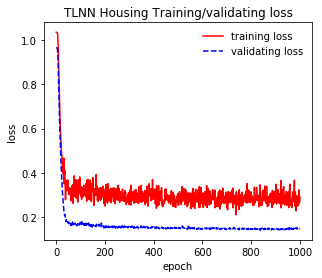

In [13]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('TLNN Housing loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Housing Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
#plt.show()


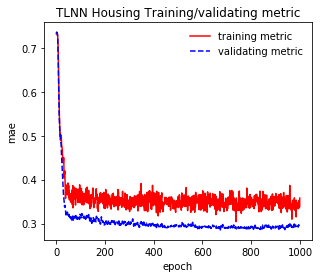

In [14]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Housing metric', figsize = (4.8, 4.0))
plt.plot(history.history['mean_absolute_error'], "r-")
plt.plot(history.history['val_mean_absolute_error'], "b--")
plt.title('TLNN Housing Training/validating metric')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
#plt.show()


Text(0.5,0,'fitted values')

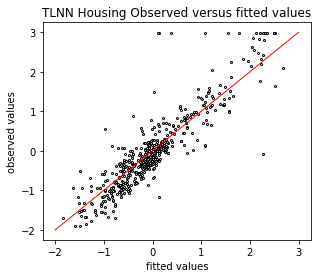

In [15]:

#----------------------------------------
# Plot the observed and fitted response values.

fitted = model.predict([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train])  # Here, this is used to compute fitted response values.
fitted = fitted[:, 0]

fitted.shape
Y_train.shape

all = np.concatenate((Y_train, fitted))
draw_min = np.floor(np.min(all))
draw_max = np.ceil(np.max(all))

plt.figure('TLNN Housing', figsize = (4.8, 4.0))
plt.plot(fitted, Y_train, 'wo', markersize = 2, markeredgecolor = "black")
plt.plot([draw_min, draw_max], [draw_min, draw_max], '-', linewidth = 1, color = 'red')
plt.title('TLNN Housing Observed versus fitted values')
plt.ylabel('observed values')
plt.xlabel('fitted values')
#plt.show()